In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem Statement

Task 1:- To prepare a complete data analysis report on the given data.

Task 2:-

a) To create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      

b) To determine the relationship between the house features and how the price varies based on this.

Task3:- To come up with suggestions for the customer to buy the house according to the area, price and other requirements.


## Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


## Load data

In [ ]:
data=pd.read_csv('/content/HousePricePred.csv')

## Domain analysis

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this  dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



### Attribute Information:



●	SalePrice - the property's sale price in dollars. This is the target variable to be predicted
●	MSSubClass: The building class
●	MSZoning: The general zoning classification
●	LotFrontage: Linear feet of street connected to property
●	LotArea: Lot size in square feet
●	Street: Type of road access
●	Alley: Type of alley access
●	LotShape: General shape of property
●	LandContour: Flatness of the property
●	Utilities: Type of utilities available
●	LotConfig: Lot configuration
●	LandSlope: Slope of property
●	Neighborhood: Physical locations within Ames city limits
●	Condition1: Proximity to main road or railroad
●	Condition2: Proximity to main road or railroad (if a second is present)
●	BldgType: Type of dwelling
●	HouseStyle: Style of dwelling
●	OverallQual: Overall material and finish quality
●	OverallCond: Overall condition rating
●	YearBuilt: Original construction date
●	YearRemodAdd: Remodel date
●	RoofStyle: Type of roof
●	RoofMatl: Roof material
●	Exterior1st: Exterior covering on house
●	Exterior2nd: Exterior covering on house (if more than one material)
●	MasVnrType: Masonry veneer type
●	MasVnrArea: Masonry veneer area in square feet
●	ExterQual: Exterior material quality
●	ExterCond: Present condition of the material on the exterior
●	Foundation: Type of foundation
●	BsmtQual: Height of the basement
●	BsmtCond: General condition of the basement
●	BsmtExposure: Walkout or garden level basement walls
●	BsmtFinType1: Quality of basement finished area
●	BsmtFinSF1: Type 1 finished square feet
●	BsmtFinType2: Quality of second finished area (if present)
●	BsmtFinSF2: Type 2 finished square feet
●	BsmtUnfSF: Unfinished square feet of basement area
●	TotalBsmtSF: Total square feet of basement area
●	Heating: Type of heating
●	HeatingQC: Heating quality and condition
●	CentralAir: Central air conditioning
●	Electrical: Electrical system
●	1stFlrSF: First Floor square feet
●	2ndFlrSF: Second floor square feet
●	LowQualFinSF: Low quality finished square feet (all floors)
●	GrLivArea: Above grade (ground) living area square feet
●	BsmtFullBath: Basement full bathrooms
●	BsmtHalfBath: Basement half bathrooms
●	FullBath: Full bathrooms above grade
●	HalfBath: Half baths above grade
●	Bedroom: Number of bedrooms above basement level
●	Kitchen: Number of kitchens
●	KitchenQual: Kitchen quality
●	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
●	Functional: Home functionality rating
●	Fireplaces: Number of fireplaces
●	FireplaceQu: Fireplace quality
●	GarageType: Garage location
●	GarageYrBlt: Year garage was built
●	GarageFinish: Interior finish of the garage
●	GarageCars: Size of garage in car capacity
●	GarageArea: Size of garage in square feet
●	GarageQual: Garage quality
●	GarageCond: Garage condition
●	PavedDrive: Paved driveway
●	WoodDeckSF: Wood deck area in square feet
●	OpenPorchSF: Open porch area in square feet
●	EnclosedPorch: Enclosed porch area in square feet
●	3SsnPorch: Three season porch area in square feet
●	ScreenPorch: Screen porch area in square feet
●	PoolArea: Pool area in square feet
●	PoolQC: Pool quality
●	Fence: Fence quality
●	MiscFeature: Miscellaneous feature not covered in other categories
●	MiscVal: $Value of miscellaneous feature
●	MoSold: Month Sold
●	YrSold: Year Sold
●	SaleType: Type of sale
●	SaleCondition: Condition of sale



# Basic checks

In [ ]:
## Call the dataframe and do basic checks
pd.set_option('display.max_columns', None)

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
data['LotFrontage'].median()

69.0

In [ ]:
data.loc[data['MiscFeature'].isnull()==True]
data['MiscFeature'].isnull().sum()
data.shape

(1460, 81)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
## Sum of
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Fetching only categorical columns from the data

categorical_cols = data.select_dtypes('object').columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
##creating a sub_data for categorcal variables and sales price

data_categorical = pd.concat([data[categorical_cols],data['SalePrice']], axis=1)
data_categorical

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [ ]:
data_categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [ ]:
# prompt: fetch only numerical continuous columns from data, exclude datetime column

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
data_numerical = data[numerical_cols]
print(len(numerical_cols))
data_numerical

38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [ ]:
# prompt: check disctint values in each column
data[numerical_cols].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [ ]:
datetime_cols = [col for col in data if 'Yr'in  col or 'Year'in  col ]
datetime_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
data_datetime = pd.concat([data[datetime_cols],data['SalePrice']], axis=1)
data_datetime

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  SalePrice
0          2003          2003       2003.0    2008     208500
1          1976          1976       1976.0    2007     181500
2          2001          2002       2001.0    2008     223500
3          1915          1970       1998.0    2006     140000
4          2000          2000       2000.0    2008     250000
...         ...           ...          ...     ...        ...
1455       1999          2000       1999.0    2007     175000
1456       1978          1988       1978.0    2010     210000
1457       1941          2006       1941.0    2010     266500
1458       1950          1996       1950.0    2010     142125
1459       1965          1965       1965.0    2008     147500

[1460 rows x 5 columns]

In [ ]:
numerical_discrete_cols = [col for col in numerical_cols if len(data[col].unique()) < 25 and col not in datetime_cols]
numerical_discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
data_discrete = pd.concat([data[numerical_discrete_cols],data['SalePrice']], axis=1)
data_discrete

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0             60            7            5             0             1   
1             20            6            8             0             0   
2             60            7            5             0             1   
3             70            7            5             0             1   
4             60            8            5             0             1   
...          ...          ...          ...           ...           ...   
1455          60            6            5             0             0   
1456          20            6            6             0             1   
1457          70            7            9             0             0   
1458          20            5            6             0             1   
1459          20            5            6             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
0                8           0           2          0         0        0   
1                6           1           2          0         0        0   
2                6           1           2          0         0        0   
3                7           1           3          0         0        0   
4                9           1           3          0         0        0   
...            ...         ...         ...        ...       ...      ...   
1455             7           1           2          0         0        0   
1456             7           2           2          0         0        0   
1457             9           2           1          0         0     2500   
1458             5           0           1          0         0        0   
1459             6           0           1          0         0        0   

      MoSold  SalePrice  
0          2     208500  
1          5     181500  
2          9     223500  
3          2     140000  
4         12     250000  
...      ...        ...  
1455       8     175000  
1456       2     210000  
1457       5     266500  
1458       4     142125  
1459       6     147500  

[1460 rows x 18 columns]

In [ ]:
numerical_continuous_cols = [col for col in numerical_cols if col not in numerical_discrete_cols and col not in datetime_cols and col != 'Id']
numerical_continuous_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
data_continuous = data[numerical_continuous_cols]
data_continuous
#data_continuous.drop('SalePrice', axis=1)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0         706           0        150   
1            80.0     9600         0.0         978           0        284   
2            68.0    11250       162.0         486           0        434   
3            60.0     9550         0.0         216           0        540   
4            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1455         62.0     7917         0.0           0           0        953   
1456         85.0    13175       119.0         790         163        589   
1457         66.0     9042         0.0         275           0        877   
1458         68.0     9717         0.0          49        1029          0   
1459         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0             856       856       854       1710         548           0   
1            1262      1262         0       1262         460         298   
2             920       920       866       1786         608           0   
3             756       961       756       1717         642           0   
4            1145      1145      1053       2198         836         192   
...           ...       ...       ...        ...         ...         ...   
1455          953       953       694       1647         460           0   
1456         1542      2073         0       2073         500         349   
1457         1152      1188      1152       2340         252           0   
1458         1078      1078         0       1078         240         366   
1459         1256      1256         0       1256         276         736   

      OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0              61              0            0     208500  
1               0              0            0     181500  
2              42              0            0     223500  
3              35            272            0     140000  
4              84              0            0     250000  
...           ...            ...          ...        ...  
1455           40              0            0     175000  
1456            0              0            0     210000  
1457           60              0            0     266500  
1458            0            112            0     142125  
1459           68              0            0     147500  

[1460 rows x 16 columns]

# Exploratory Data Analysis

## Univariate analysis
## Bivaraite analysis--Autoviz

In [ ]:
!pip install sweetviz

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Numerical (Continuous) Data

In [ ]:
# Plotting how every numerical feature correlate with the "target"
# description of the dataset continuous variables

data_continuous.describe().transpose()

count           mean           std      min        25%  \
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
GrLivArea        1464.0    1776.75    5642.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
ScreenPorch         0.0       0.00     480.0  
SalePrice      163000.0  214000.00  755000.0

In [ ]:
data_continuous.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
SalePrice          0
dtype: int64

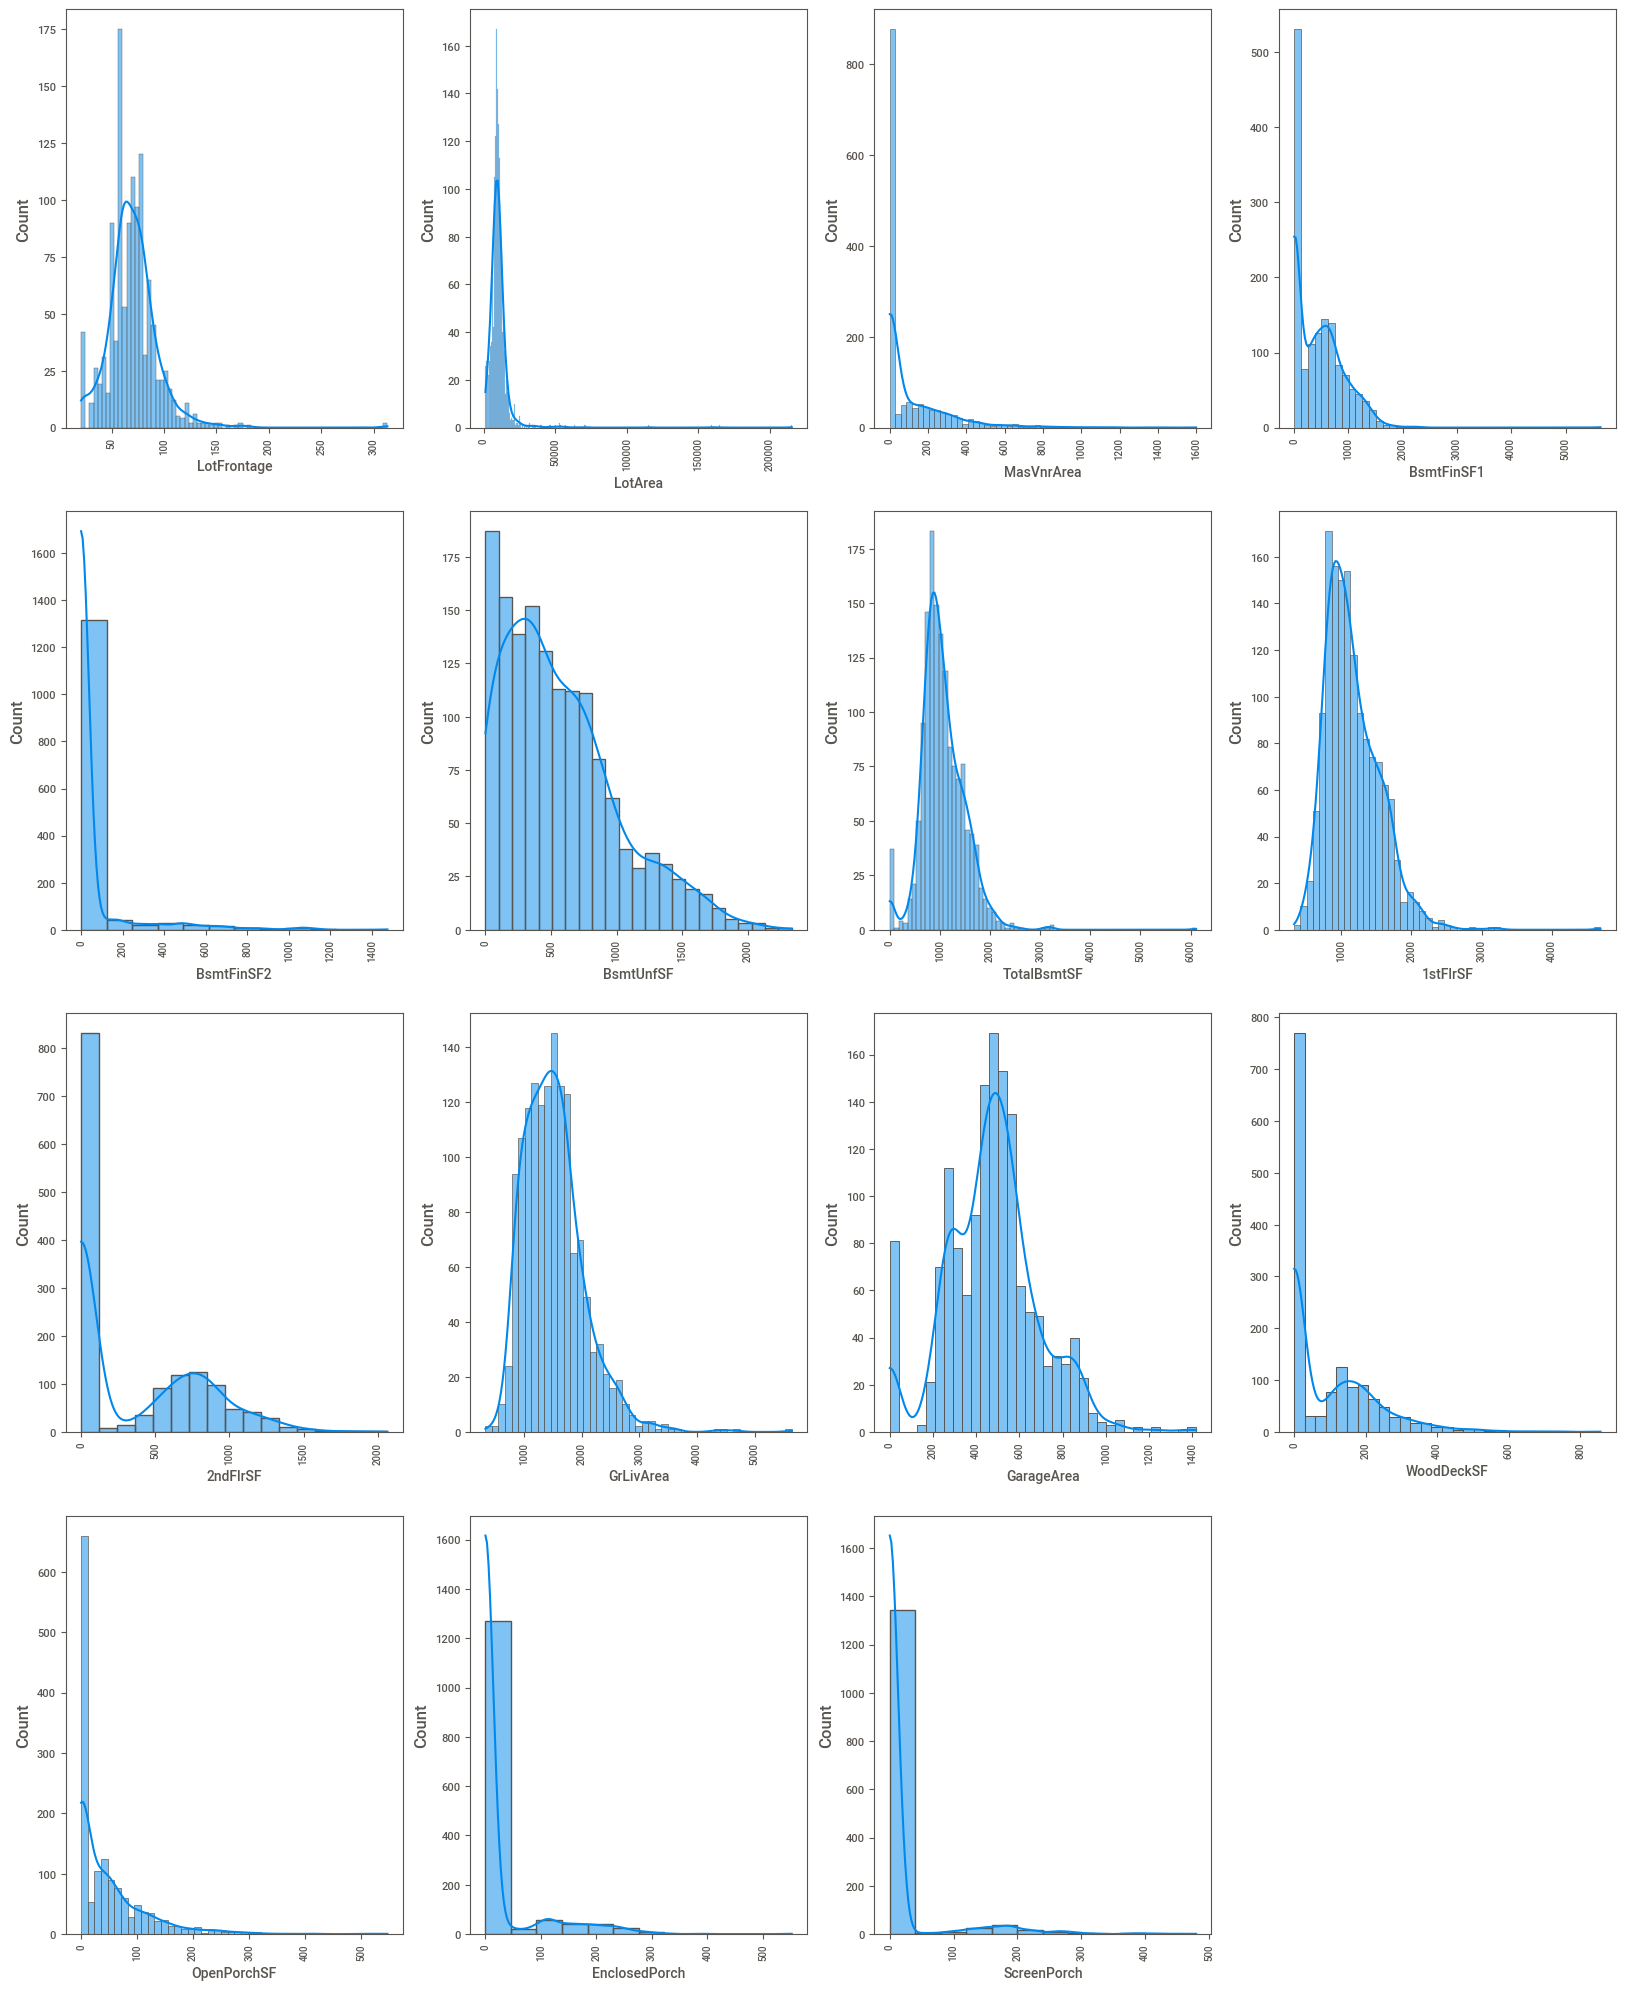

In [ ]:
#distribution plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for cols in data_continuous:
  if cols != 'SalePrice':
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(data_continuous[cols],  kde=True)
        plt.xlabel(cols,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
    plt.xticks(rotation=90,fontsize=7)
        #plt.xlabel(col)
plt.show()

### Box Plot

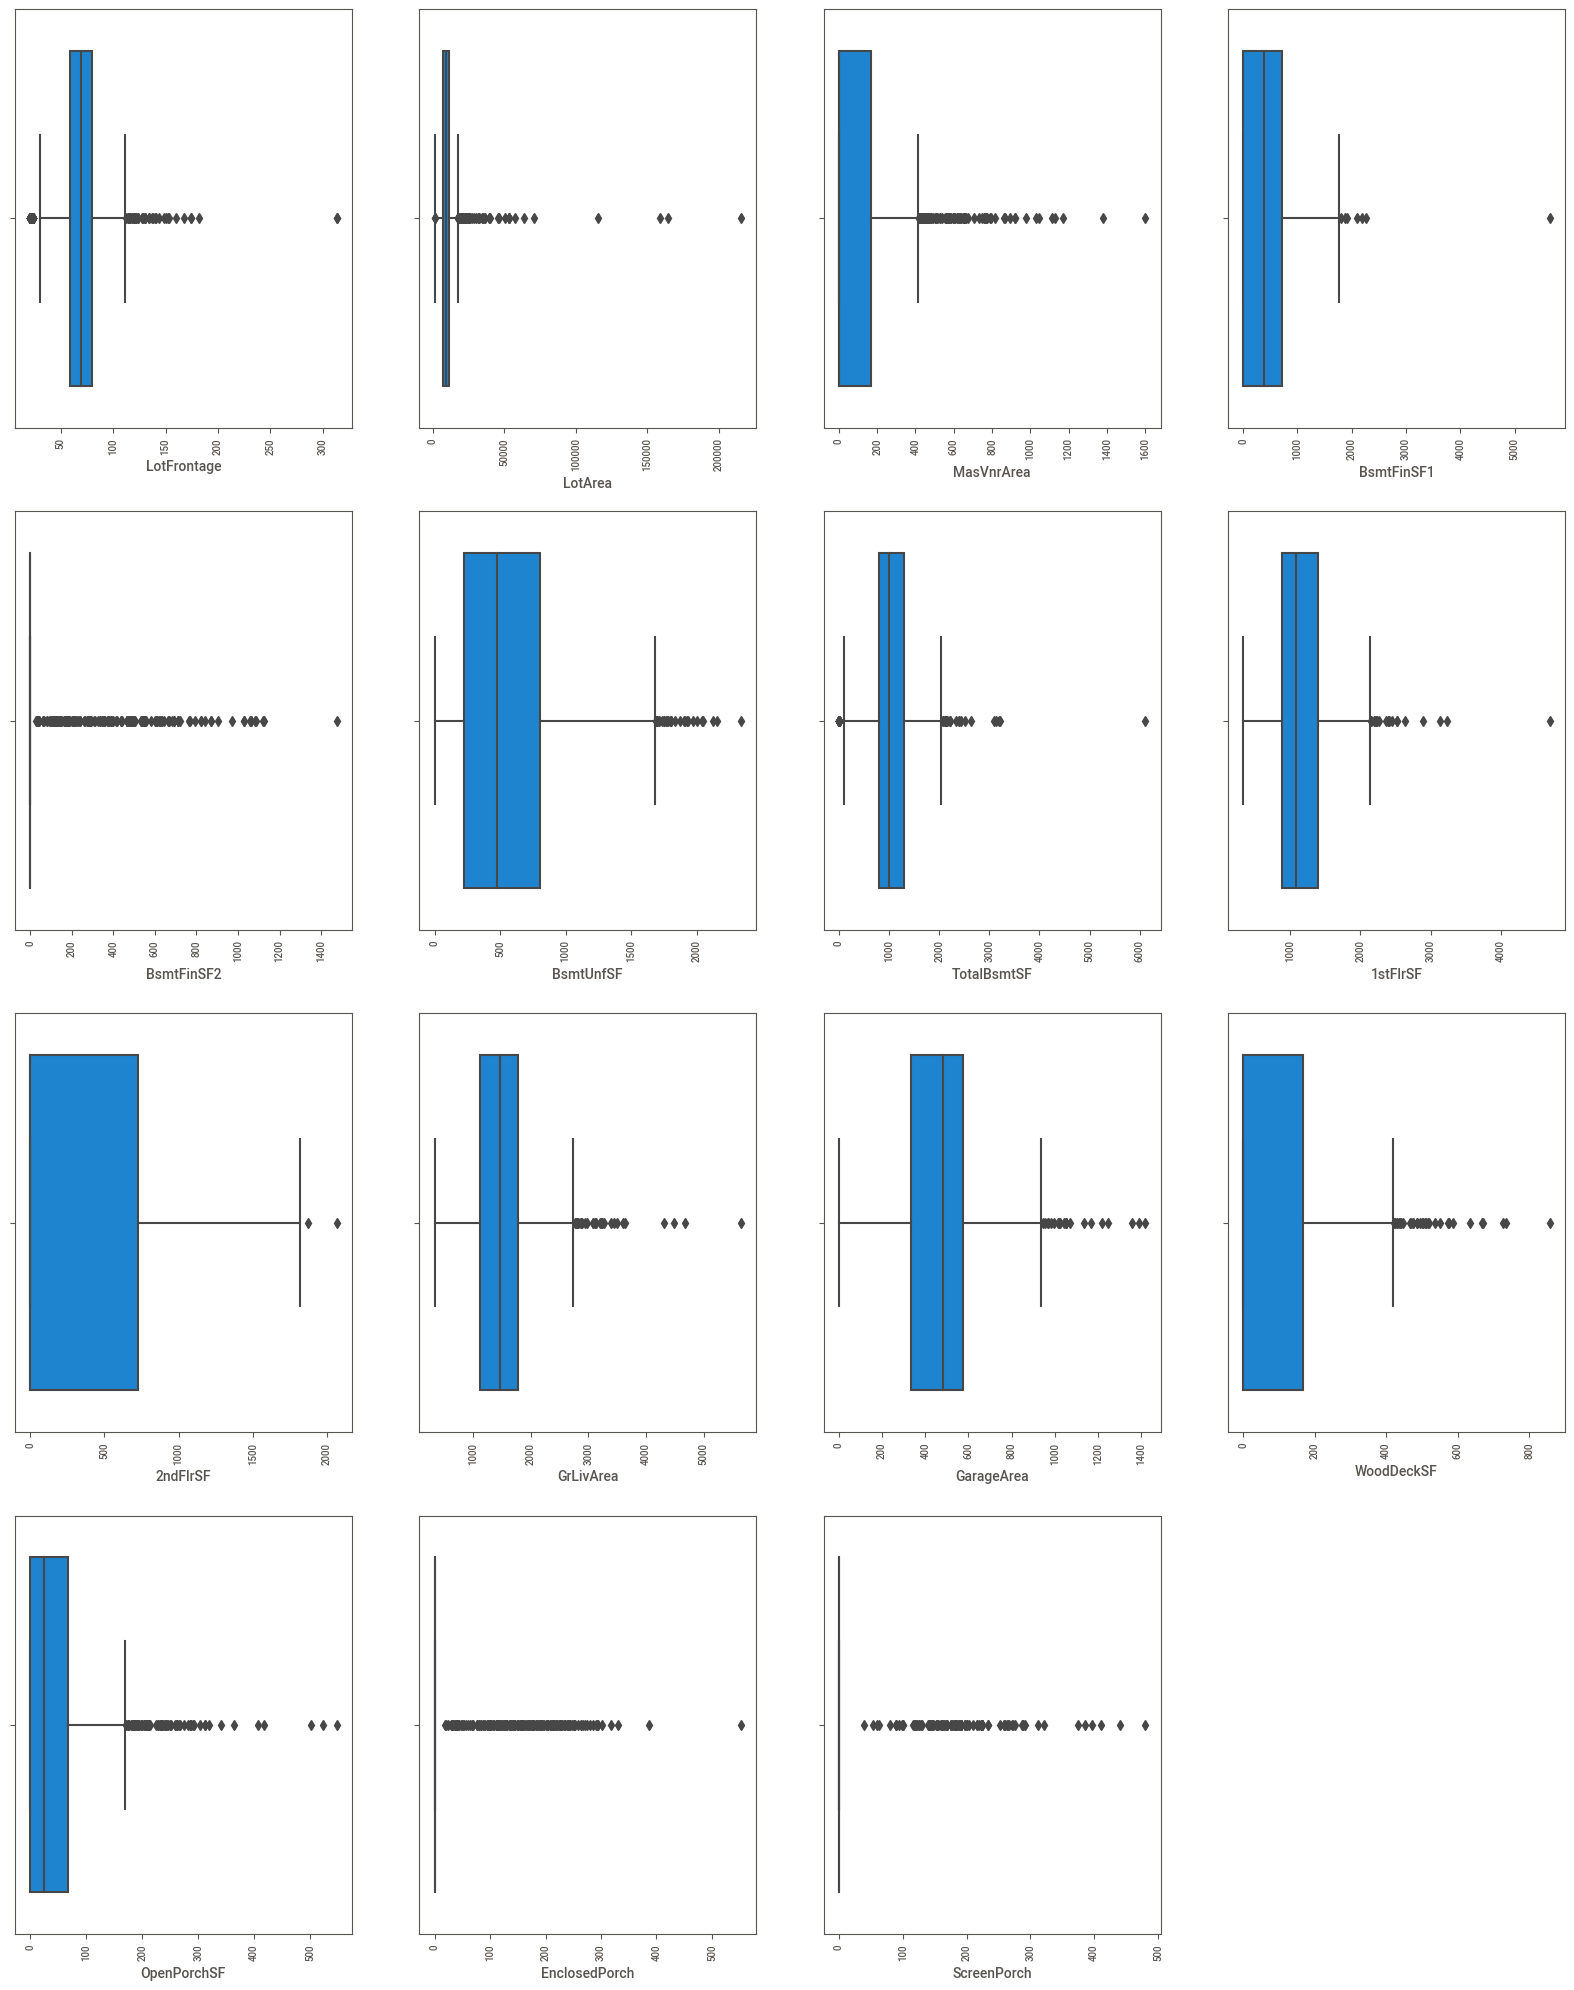

In [ ]:
# prompt: iterate through data_continuous dataframe and plot box plot for each column in a grid

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for cols in data_continuous:
  if cols != 'SalePrice':
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data_continuous[cols])
        plt.xlabel(cols,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
    plt.xticks(rotation=90,fontsize=7)
        #plt.xlabel(col)
plt.show()


In [ ]:
# Create a dictionary to store the results for each column
outlier_info = {}

# Iterate through each column in your dataset
for cols in data_continuous.columns:
    # Calculate statistics for the current column
    Q1 = data_continuous[cols].quantile(0.25)
    Q3 = data_continuous[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the count of values greater than max_limit and less than min_limit for the current column
    cnt_greater_max = (data_continuous[cols] > (Q3 + 1.5 * IQR)).sum()
    cnt_less_min = (data_continuous[cols] < (Q1 - 1.5 * IQR)).sum()

    # Calculate the percentage of values greater than max_limit and less than min_limit for the current column
    percent_greater_max = (cnt_greater_max / len(data)) * 100
    percent_less_min = (cnt_less_min / len(data)) * 100

    # Store the results in the dictionary
    outlier_info[cols] = {
        'count_greater_max': cnt_greater_max,
        'percent_greater_max': percent_greater_max,
        'count_less_min': cnt_less_min,
        'percent_less_min': percent_less_min
    }

# Print the results for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"Count Greater Than max_limit: {info['count_greater_max']}")
    print(f"Percent Greater Than max_limit: {info['percent_greater_max']:.2f}%")
    print(f"Count Less Than min_limit: {info['count_less_min']}")
    print(f"Percent Less Than min_limit: {info['percent_less_min']:.2f}%")
    print()

Column: LotFrontage
Count Greater Than max_limit: 46
Percent Greater Than max_limit: 3.15%
Count Less Than min_limit: 42
Percent Less Than min_limit: 2.88%

Column: LotArea
Count Greater Than max_limit: 67
Percent Greater Than max_limit: 4.59%
Count Less Than min_limit: 2
Percent Less Than min_limit: 0.14%

Column: MasVnrArea
Count Greater Than max_limit: 96
Percent Greater Than max_limit: 6.58%
Count Less Than min_limit: 0
Percent Less Than min_limit: 0.00%

Column: BsmtFinSF1
Count Greater Than max_limit: 7
Percent Greater Than max_limit: 0.48%
Count Less Than min_limit: 0
Percent Less Than min_limit: 0.00%

Column: BsmtFinSF2
Count Greater Than max_limit: 167
Percent Greater Than max_limit: 11.44%
Count Less Than min_limit: 0
Percent Less Than min_limit: 0.00%

Column: BsmtUnfSF
Count Greater Than max_limit: 29
Percent Greater Than max_limit: 1.99%
Count Less Than min_limit: 0
Percent Less Than min_limit: 0.00%

Column: TotalBsmtSF
Count Greater Than max_limit: 24
Percent Greater Th

## Outlier Handling

In [ ]:
from scipy import stats

# Initialize a dictionary to store outlier bounds for each column
outlier_bounds = {}

# Iterate through each column in your dataset
for cols in data_continuous.columns:
    IQR = stats.iqr(data_continuous[cols], interpolation='midpoint')
    Q1 = data_continuous[cols].quantile(0.25)
    Q3 = data_continuous[cols].quantile(0.75)

    # Calculate the lower and upper bounds for potential outliers
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR

    # Store the outlier bounds in the dictionary
    outlier_bounds[cols] = {'min_limit': min_limit, 'max_limit': max_limit}

In [ ]:
# if any value in the column is less than min_limit, replace with median. And if any value is greater than max_limit, replace with median.
for cols in data_continuous.columns:
  if cols != 'SalePrice':
    data_continuous[cols] = np.where(data_continuous[cols] < outlier_bounds[cols]['min_limit'], data_continuous[cols].median(), data_continuous[cols])
    data_continuous[cols] = np.where(data_continuous[cols] > outlier_bounds[cols]['max_limit'], data_continuous[cols].median(), data_continuous[cols])

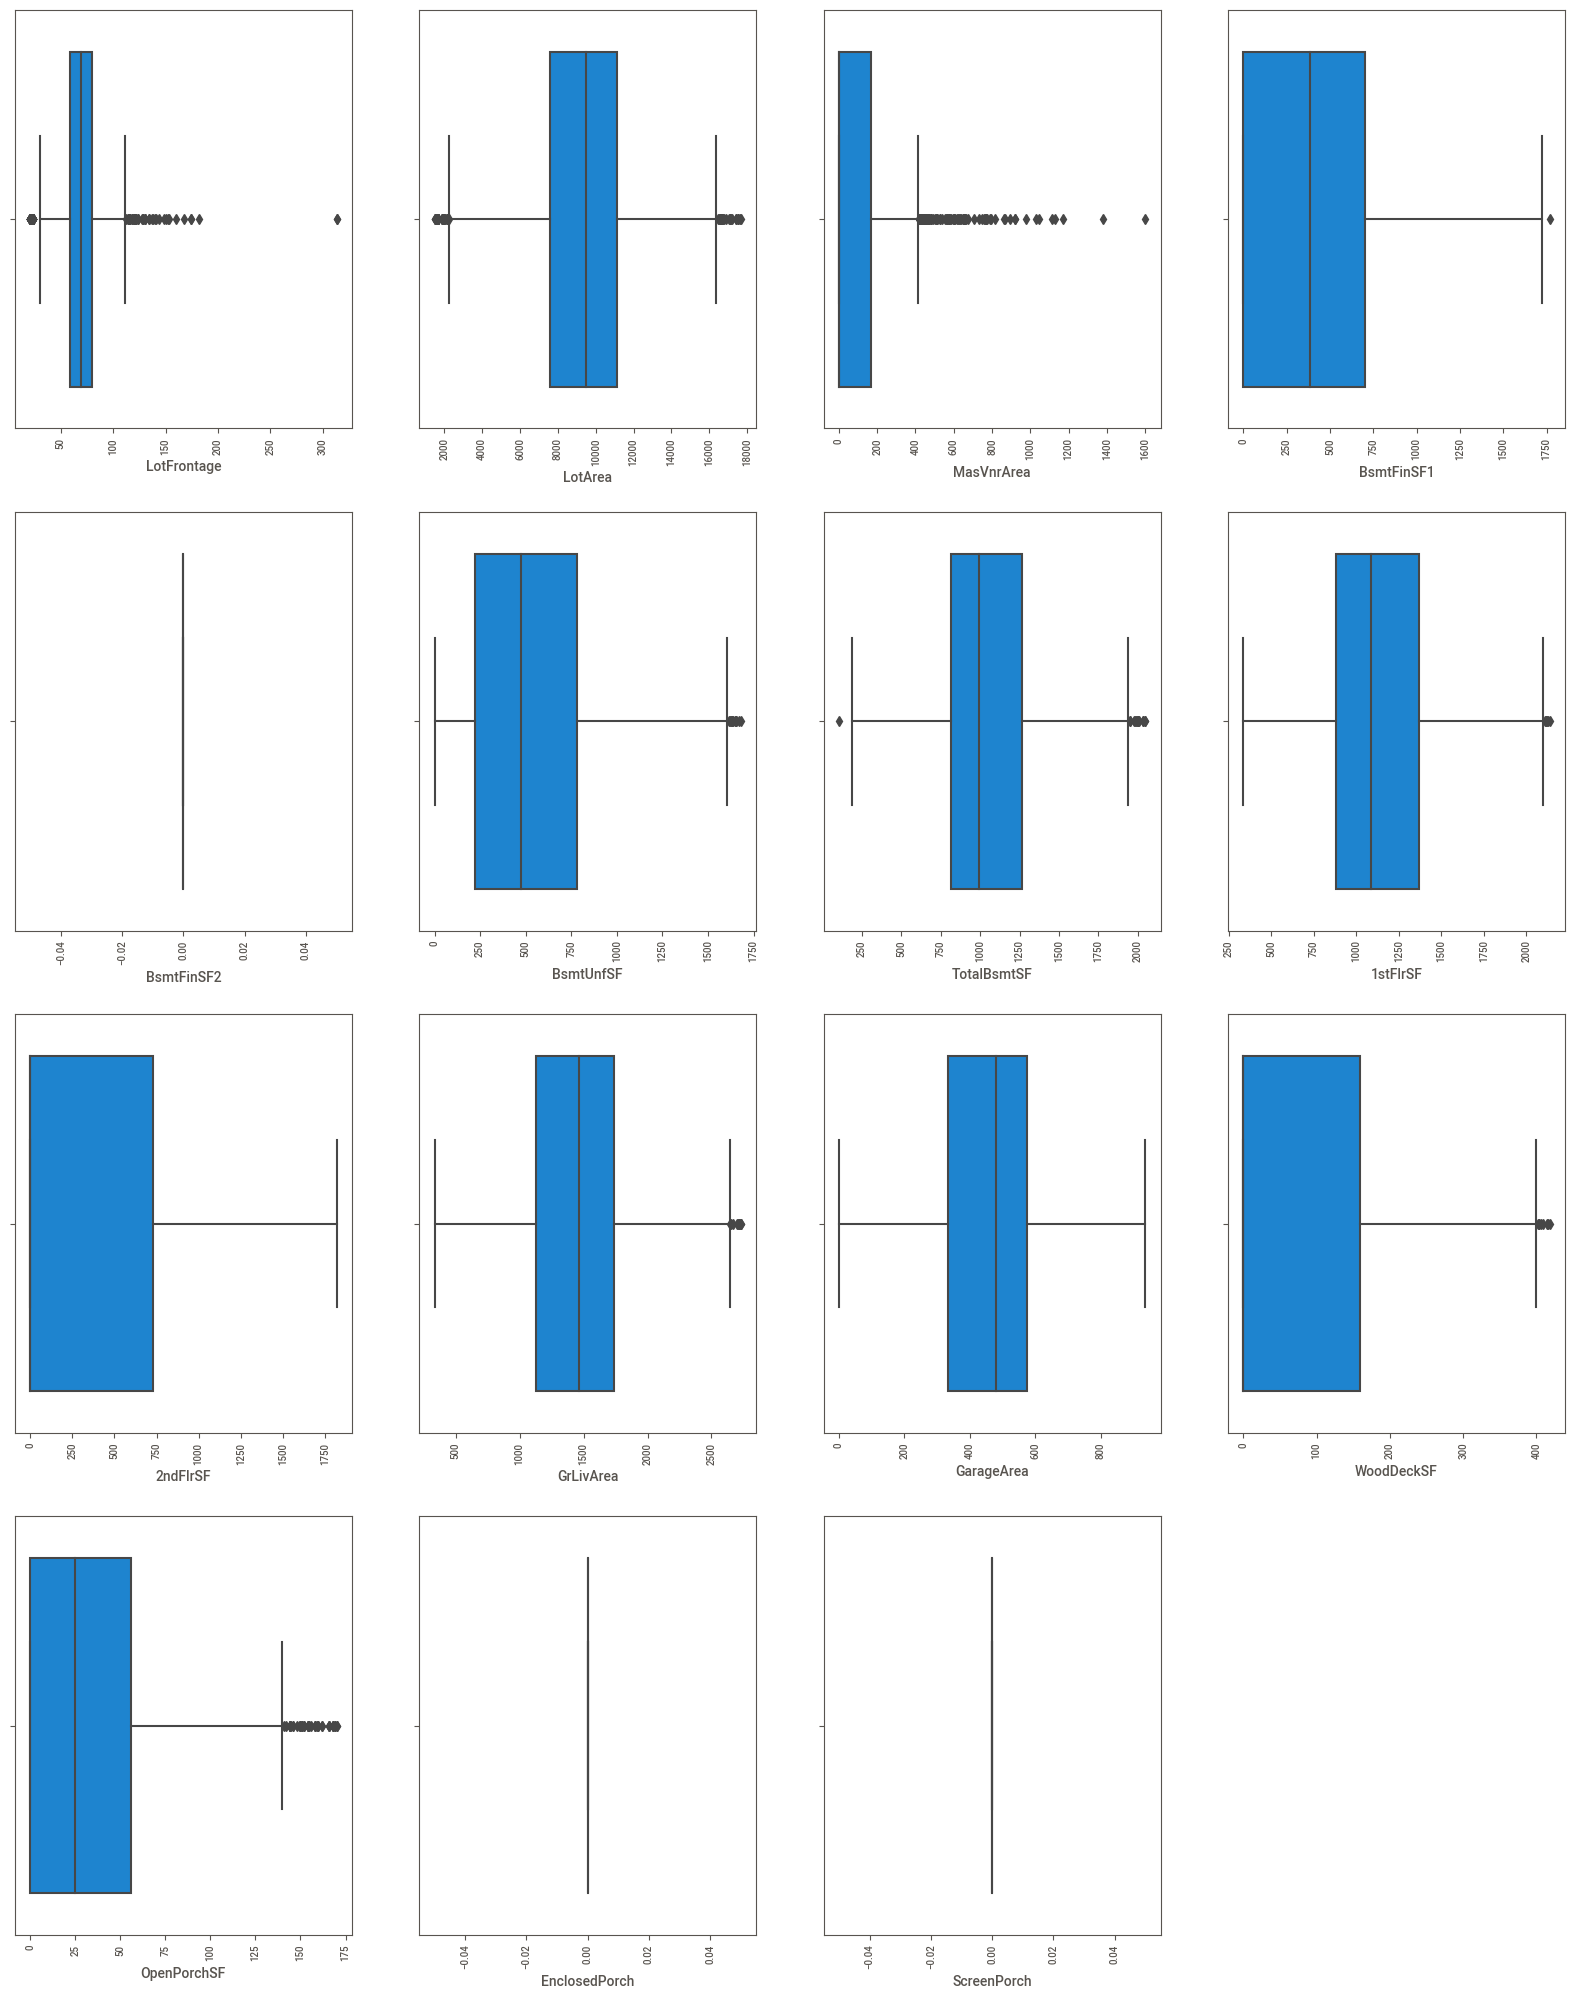

In [ ]:
# Visualize data after outlier handling with mediam values

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for cols in data_continuous:
  if cols != 'SalePrice':
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data_continuous[cols])
        plt.xlabel(cols,fontsize=10)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
    plt.xticks(rotation=90,fontsize=7)
        #plt.xlabel(col)
plt.show()


In [ ]:
data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   float64
 4   BsmtFinSF2     1460 non-null   float64
 5   BsmtUnfSF      1460 non-null   float64
 6   TotalBsmtSF    1460 non-null   float64
 7   1stFlrSF       1460 non-null   float64
 8   2ndFlrSF       1460 non-null   float64
 9   GrLivArea      1460 non-null   float64
 10  GarageArea     1460 non-null   float64
 11  WoodDeckSF     1460 non-null   float64
 12  OpenPorchSF    1460 non-null   float64
 13  EnclosedPorch  1460 non-null   float64
 14  ScreenPorch    1460 non-null   float64
 15  SalePrice      1460 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 182.6 KB


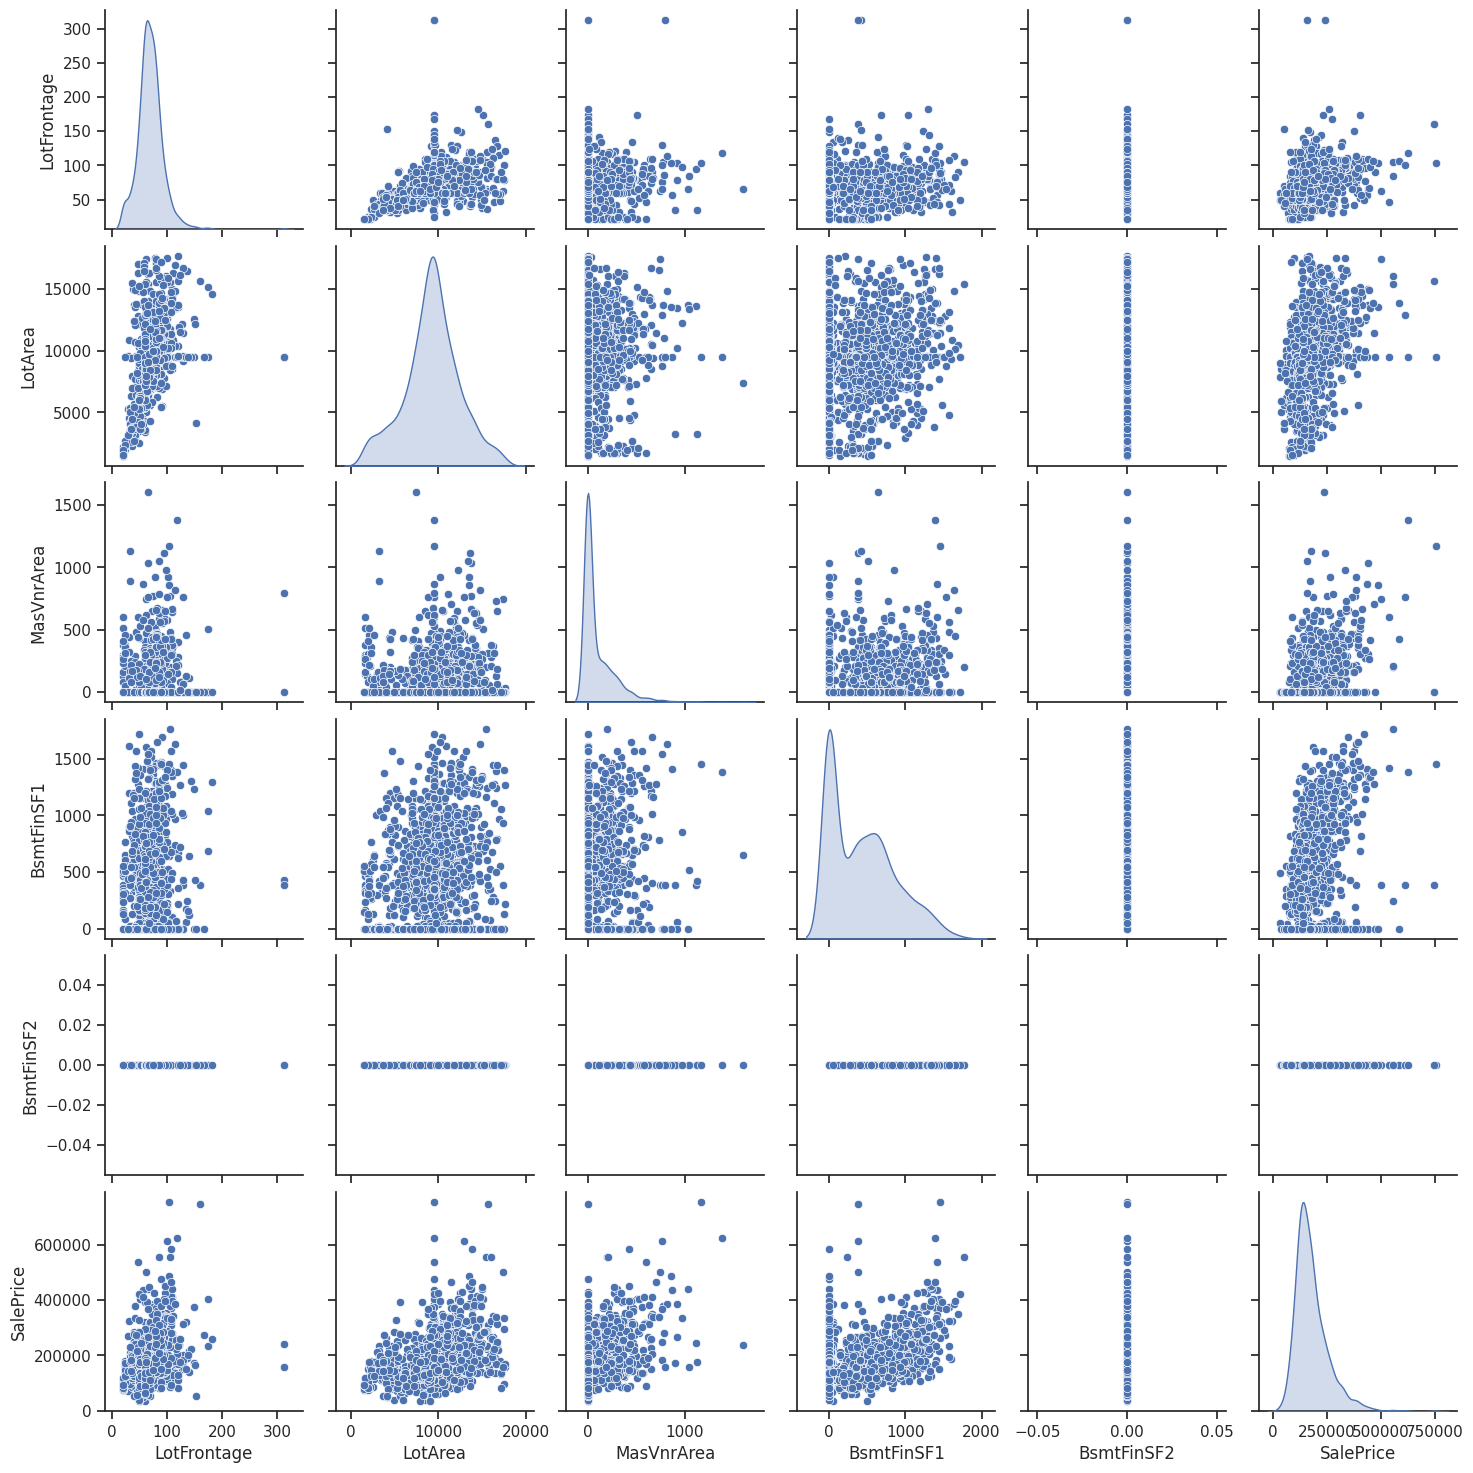

In [ ]:
## Step 3 Multivariate Analysizing

# numerical_continuous_cols = [col for col in numerical_cols if col not in numerical_discrete_cols and col not in datetime_cols and col != 'Id']
# numerical_continuous_cols
vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'SalePrice']
data_subset = data_continuous[vars]

# Use pairplot
sns.set(style='ticks')
sns.pairplot(data_subset, diag_kind='kde')
plt.show()

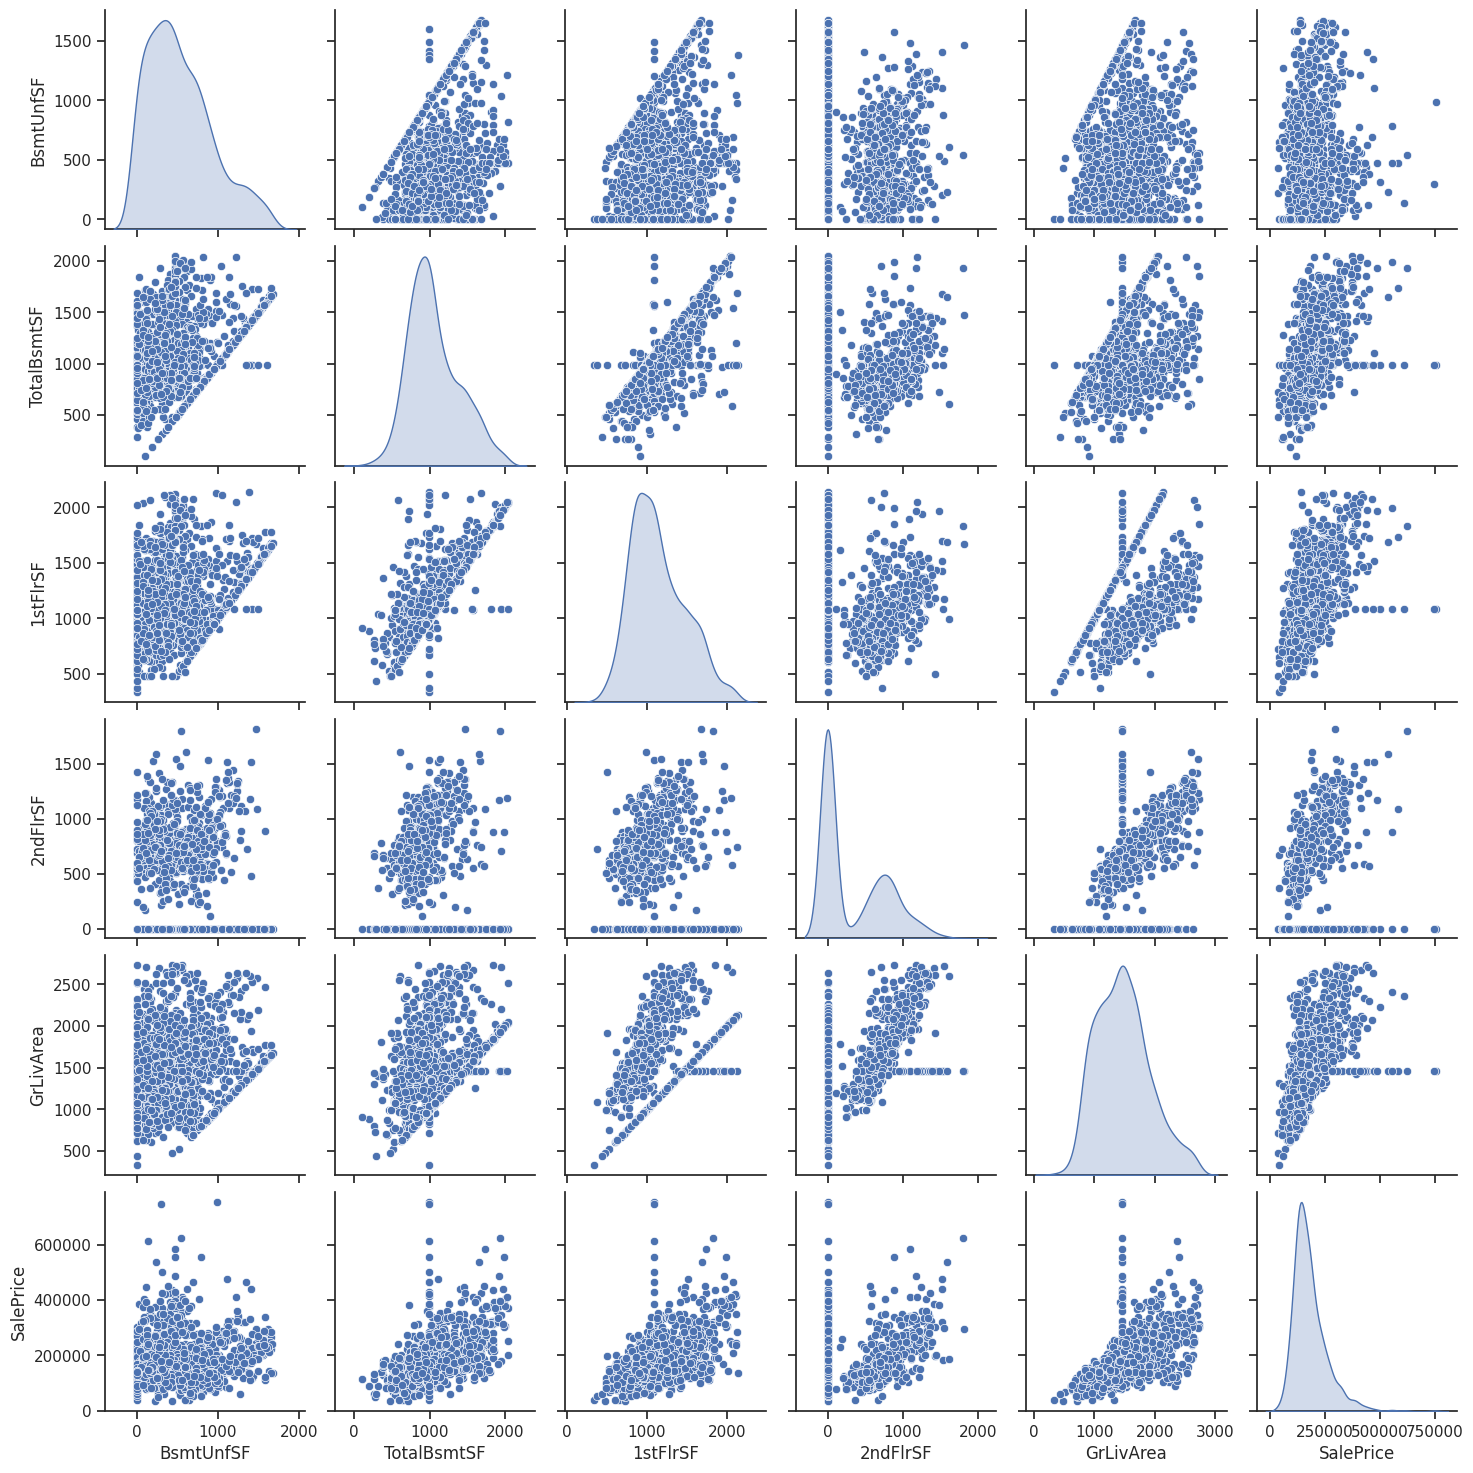

In [ ]:
vars = ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice']
data_subset = data_continuous[vars]

# Use pairplot
sns.set(style='ticks')
sns.pairplot(data_subset, diag_kind='kde')
plt.show()

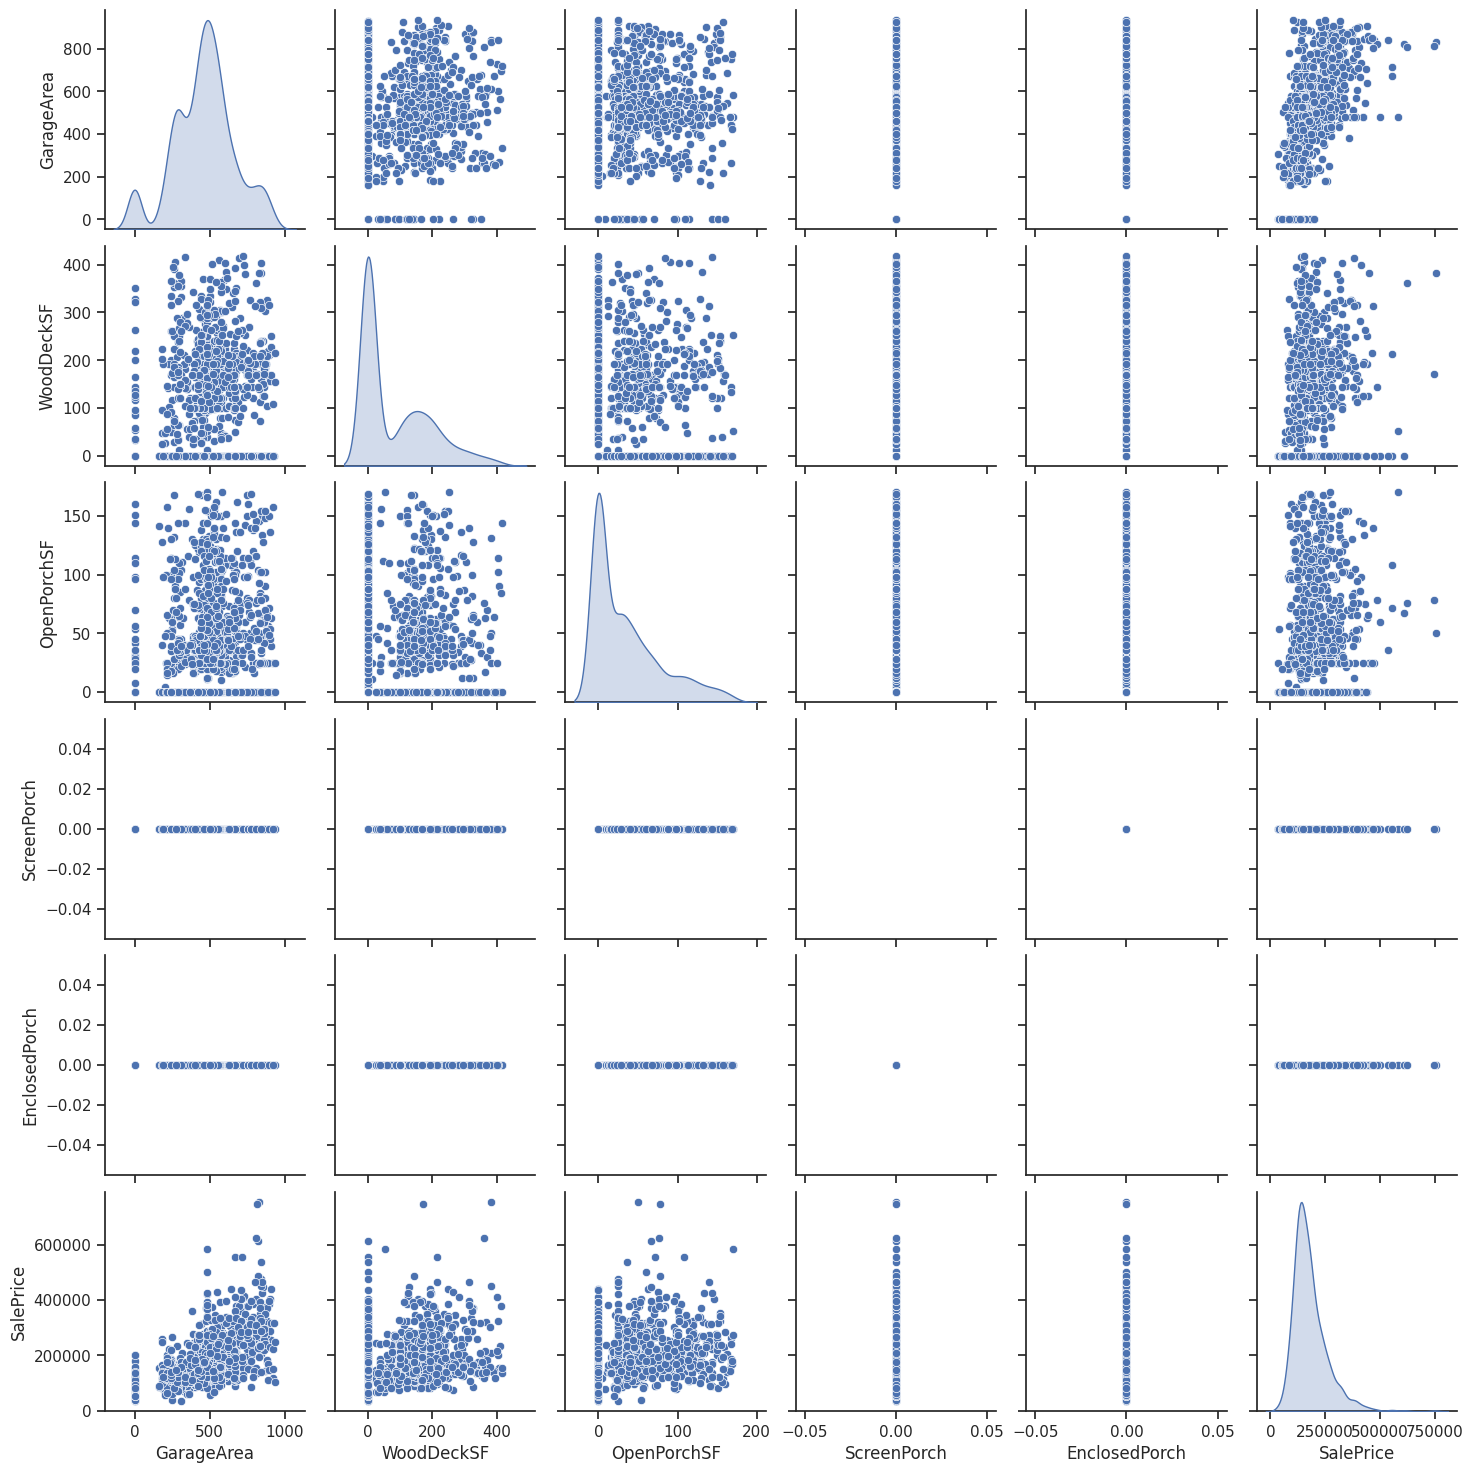

In [ ]:
vars = ['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'EnclosedPorch', 'SalePrice']
data_subset = data_continuous[vars]

# Use pairplot
sns.set(style='ticks')
sns.pairplot(data_subset, diag_kind='kde')
plt.show()

In [ ]:
# Plotting how every numerical feature correlate with the "target"
# description of the dataset continuous variables

data_continuous.describe().transpose()

count           mean           std      min       25%  \
LotFrontage    1201.0      70.049958     24.284752     21.0      59.0   
LotArea        1460.0    9276.824829   3127.208783   1477.0    7559.5   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.0   
BsmtFinSF1     1460.0     433.298973    423.115209      0.0       0.0   
BsmtFinSF2     1460.0       0.000000      0.000000      0.0       0.0   
BsmtUnfSF      1460.0     539.783219    401.167737      0.0     223.0   
TotalBsmtSF    1460.0    1056.888699    340.832851    105.0     816.0   
1stFlrSF       1460.0    1142.386301    343.020748    334.0     882.0   
2ndFlrSF       1460.0     344.295890    432.548092      0.0       0.0   
GrLivArea      1460.0    1476.480822    445.126283    334.0    1129.5   
GarageArea     1460.0     464.079452    199.257929      0.0     334.5   
WoodDeckSF     1460.0      82.601370    106.521253      0.0       0.0   
OpenPorchSF    1460.0      34.956164     43.101083      0.0       0.0   
EnclosedPorch  1460.0       0.000000      0.000000      0.0       0.0   
ScreenPorch    1460.0       0.000000      0.000000      0.0       0.0   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.0   

                      50%        75%       max  
LotFrontage        69.000      80.00     313.0  
LotArea          9478.875   11107.25   17671.0  
MasVnrArea          0.000     166.00    1600.0  
BsmtFinSF1        383.250     702.50    1767.0  
BsmtFinSF2          0.000       0.00       0.0  
BsmtUnfSF         476.750     779.25    1680.0  
TotalBsmtSF       991.625    1264.50    2046.0  
1stFlrSF         1086.500    1368.00    2136.0  
2ndFlrSF            0.000     728.00    1818.0  
GrLivArea        1464.000    1735.00    2730.0  
GarageArea        480.000     576.00     936.0  
WoodDeckSF          0.000     160.00     418.0  
OpenPorchSF        25.000      56.00     170.0  
EnclosedPorch       0.000       0.00       0.0  
ScreenPorch         0.000       0.00       0.0  
SalePrice      163000.000  214000.00  755000.0

## Feature Engineering

In [ ]:
# Calculate the total square footage
data_continuous['TotalSqrFt'] = data_continuous['1stFlrSF'] + data_continuous['2ndFlrSF'] + data_continuous['GrLivArea'] + data_continuous['WoodDeckSF']
data_continuous['TotalPorchArea'] = data_continuous['OpenPorchSF'] + data_continuous['EnclosedPorch'] + data_continuous['ScreenPorch']

# Print the total square footage
data_continuous

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0   8450.0       196.0       706.0         0.0      150.0   
1            80.0   9600.0         0.0       978.0         0.0      284.0   
2            68.0  11250.0       162.0       486.0         0.0      434.0   
3            60.0   9550.0         0.0       216.0         0.0      540.0   
4            84.0  14260.0       350.0       655.0         0.0      490.0   
...           ...      ...         ...         ...         ...        ...   
1455         62.0   7917.0         0.0         0.0         0.0      953.0   
1456         85.0  13175.0       119.0       790.0         0.0      589.0   
1457         66.0   9042.0         0.0       275.0         0.0      877.0   
1458         68.0   9717.0         0.0        49.0         0.0        0.0   
1459         75.0   9937.0         0.0       830.0         0.0      136.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0           856.0     856.0     854.0     1710.0       548.0         0.0   
1          1262.0    1262.0       0.0     1262.0       460.0       298.0   
2           920.0     920.0     866.0     1786.0       608.0         0.0   
3           756.0     961.0     756.0     1717.0       642.0         0.0   
4          1145.0    1145.0    1053.0     2198.0       836.0       192.0   
...           ...       ...       ...        ...         ...         ...   
1455        953.0     953.0     694.0     1647.0       460.0         0.0   
1456       1542.0    2073.0       0.0     2073.0       500.0       349.0   
1457       1152.0    1188.0    1152.0     2340.0       252.0         0.0   
1458       1078.0    1078.0       0.0     1078.0       240.0       366.0   
1459       1256.0    1256.0       0.0     1256.0       276.0         0.0   

      OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  TotalSqrFt  \
0            61.0            0.0          0.0     208500      3420.0   
1             0.0            0.0          0.0     181500      2822.0   
2            42.0            0.0          0.0     223500      3572.0   
3            35.0            0.0          0.0     140000      3434.0   
4            84.0            0.0          0.0     250000      4588.0   
...           ...            ...          ...        ...         ...   
1455         40.0            0.0          0.0     175000      3294.0   
1456          0.0            0.0          0.0     210000      4495.0   
1457         60.0            0.0          0.0     266500      4680.0   
1458          0.0            0.0          0.0     142125      2522.0   
1459         68.0            0.0          0.0     147500      2512.0   

      TotalPorchArea  
0               61.0  
1                0.0  
2               42.0  
3               35.0  
4               84.0  
...              ...  
1455            40.0  
1456             0.0  
1457            60.0  
1458             0.0  
1459            68.0  

[1460 rows x 18 columns]

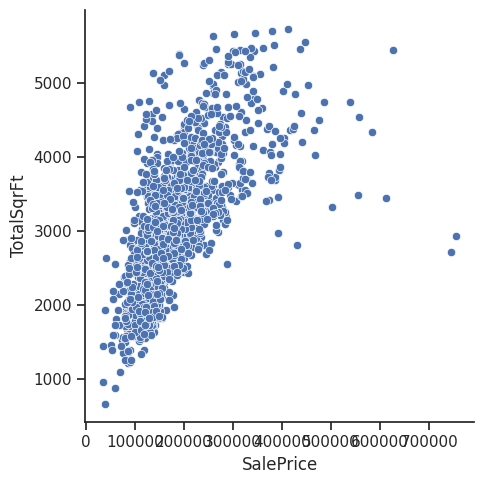

In [ ]:
## Multivariate Analyses of engineered features and target variable

# Analyzing TotalSqrFt and House Price
sns.relplot(x='SalePrice',y='TotalSqrFt',data=data_continuous)

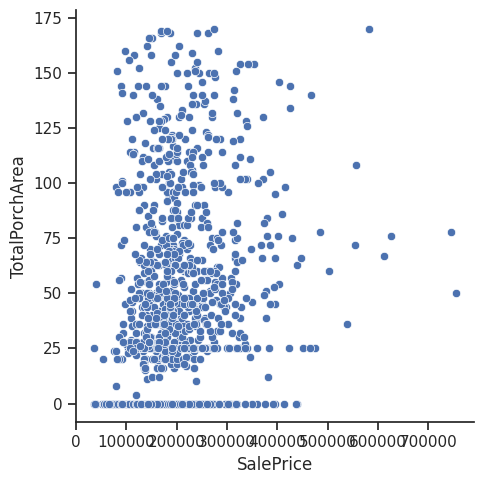

In [ ]:
## Multivariate Analyses of engineered features and target variable

# Analyzing TotalSqrFt and Sales
sns.relplot(x='SalePrice',y='TotalPorchArea',data=data_continuous)

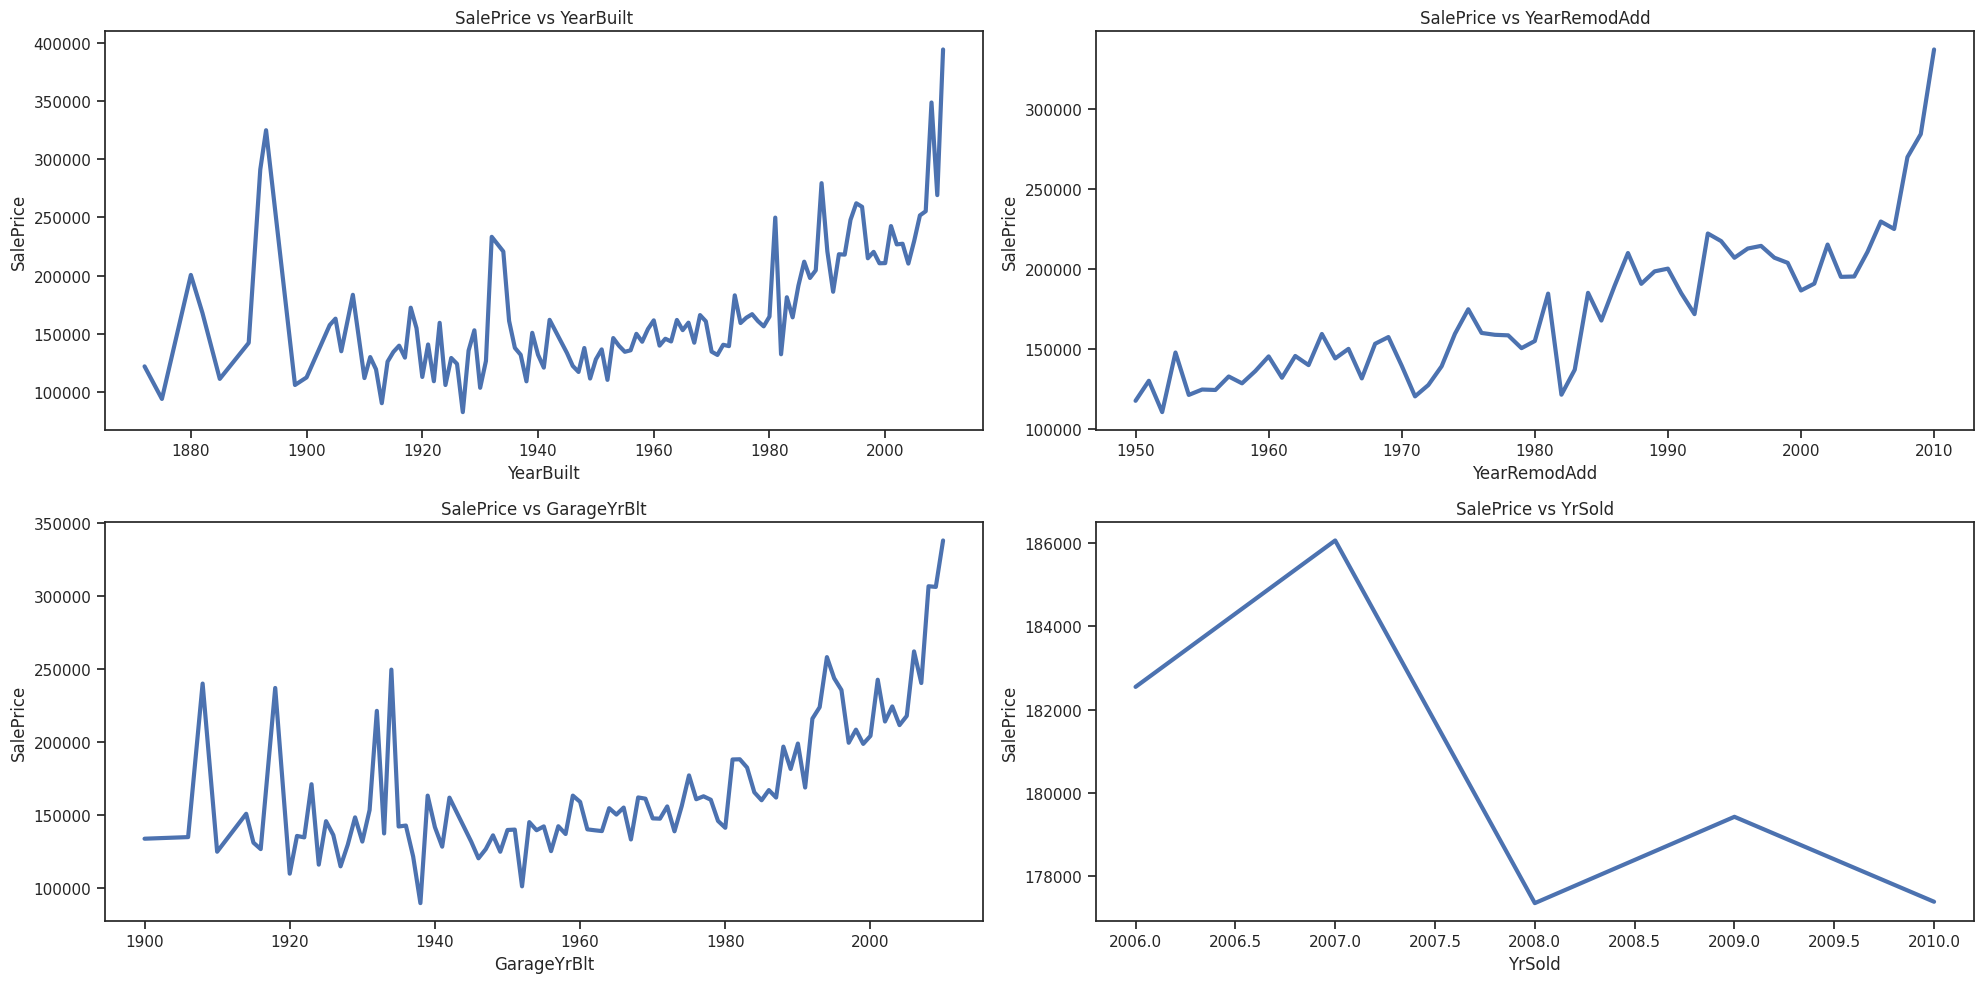

In [ ]:
# Plotting how every  datetime feature correlate with the "target"

datetime_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

plt.figure(figsize=(20, 10))

for i, cols in enumerate(datetime_columns, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x=data[cols], y=data['SalePrice'], ci=None, linewidth=3)
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {cols}')

plt.tight_layout()
plt.show()

In [ ]:
# feature engineering on datetime features YrSold YearBuilt YearRemodAdd
data_datetime['NumYearsbfSold'] = data_datetime['YrSold'] - data_datetime['YearBuilt']
data_datetime['TimesinceRemod'] = data_datetime['YearRemodAdd'] - data_datetime['YearBuilt']

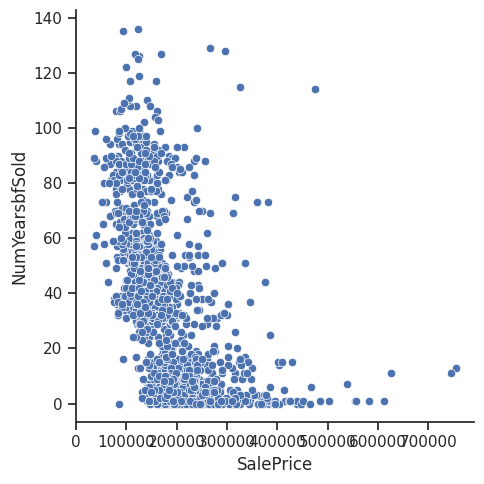

In [ ]:
# Analyzing number of years since the sale of the house

sns.relplot(x='SalePrice',y='NumYearsbfSold',data=data_datetime)

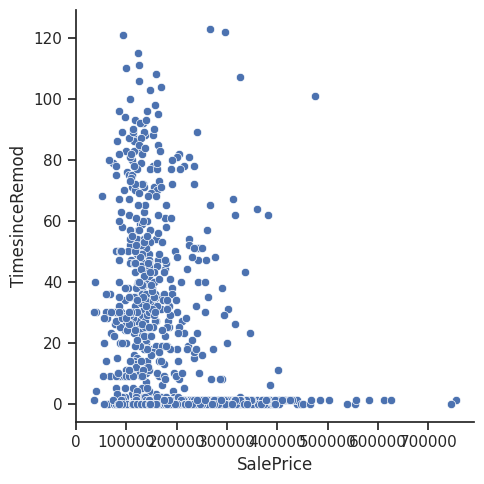

In [ ]:
# Analyzing time since previous remodelling and Sales price

sns.relplot(x='SalePrice',y='TimesinceRemod',data=data_datetime)

In [ ]:
len(data_categorical.columns)

44

In [ ]:
plt.figure(figsize=(100, 100), facecolor='white')  # Canvas size
plotnumber = 1  # Count variable

for cols in data_categorical.columns:
    if cols != 'SalePrice':
        if plotnumber <= 50:
            ax = plt.subplot(10, 5, plotnumber)
            sns.barplot(x=data_categorical[cols], y=data_categorical['SalePrice'])
            plt.xlabel(cols, fontsize=40)
            plt.ylabel('SalePrice', fontsize=40)
            plt.xticks(fontsize=30)  # Increase x-axis tick font size
            plt.yticks(fontsize=30)  # Increase y-axis tick font size
            plotnumber += 1

plt.tight_layout()
plt.show()

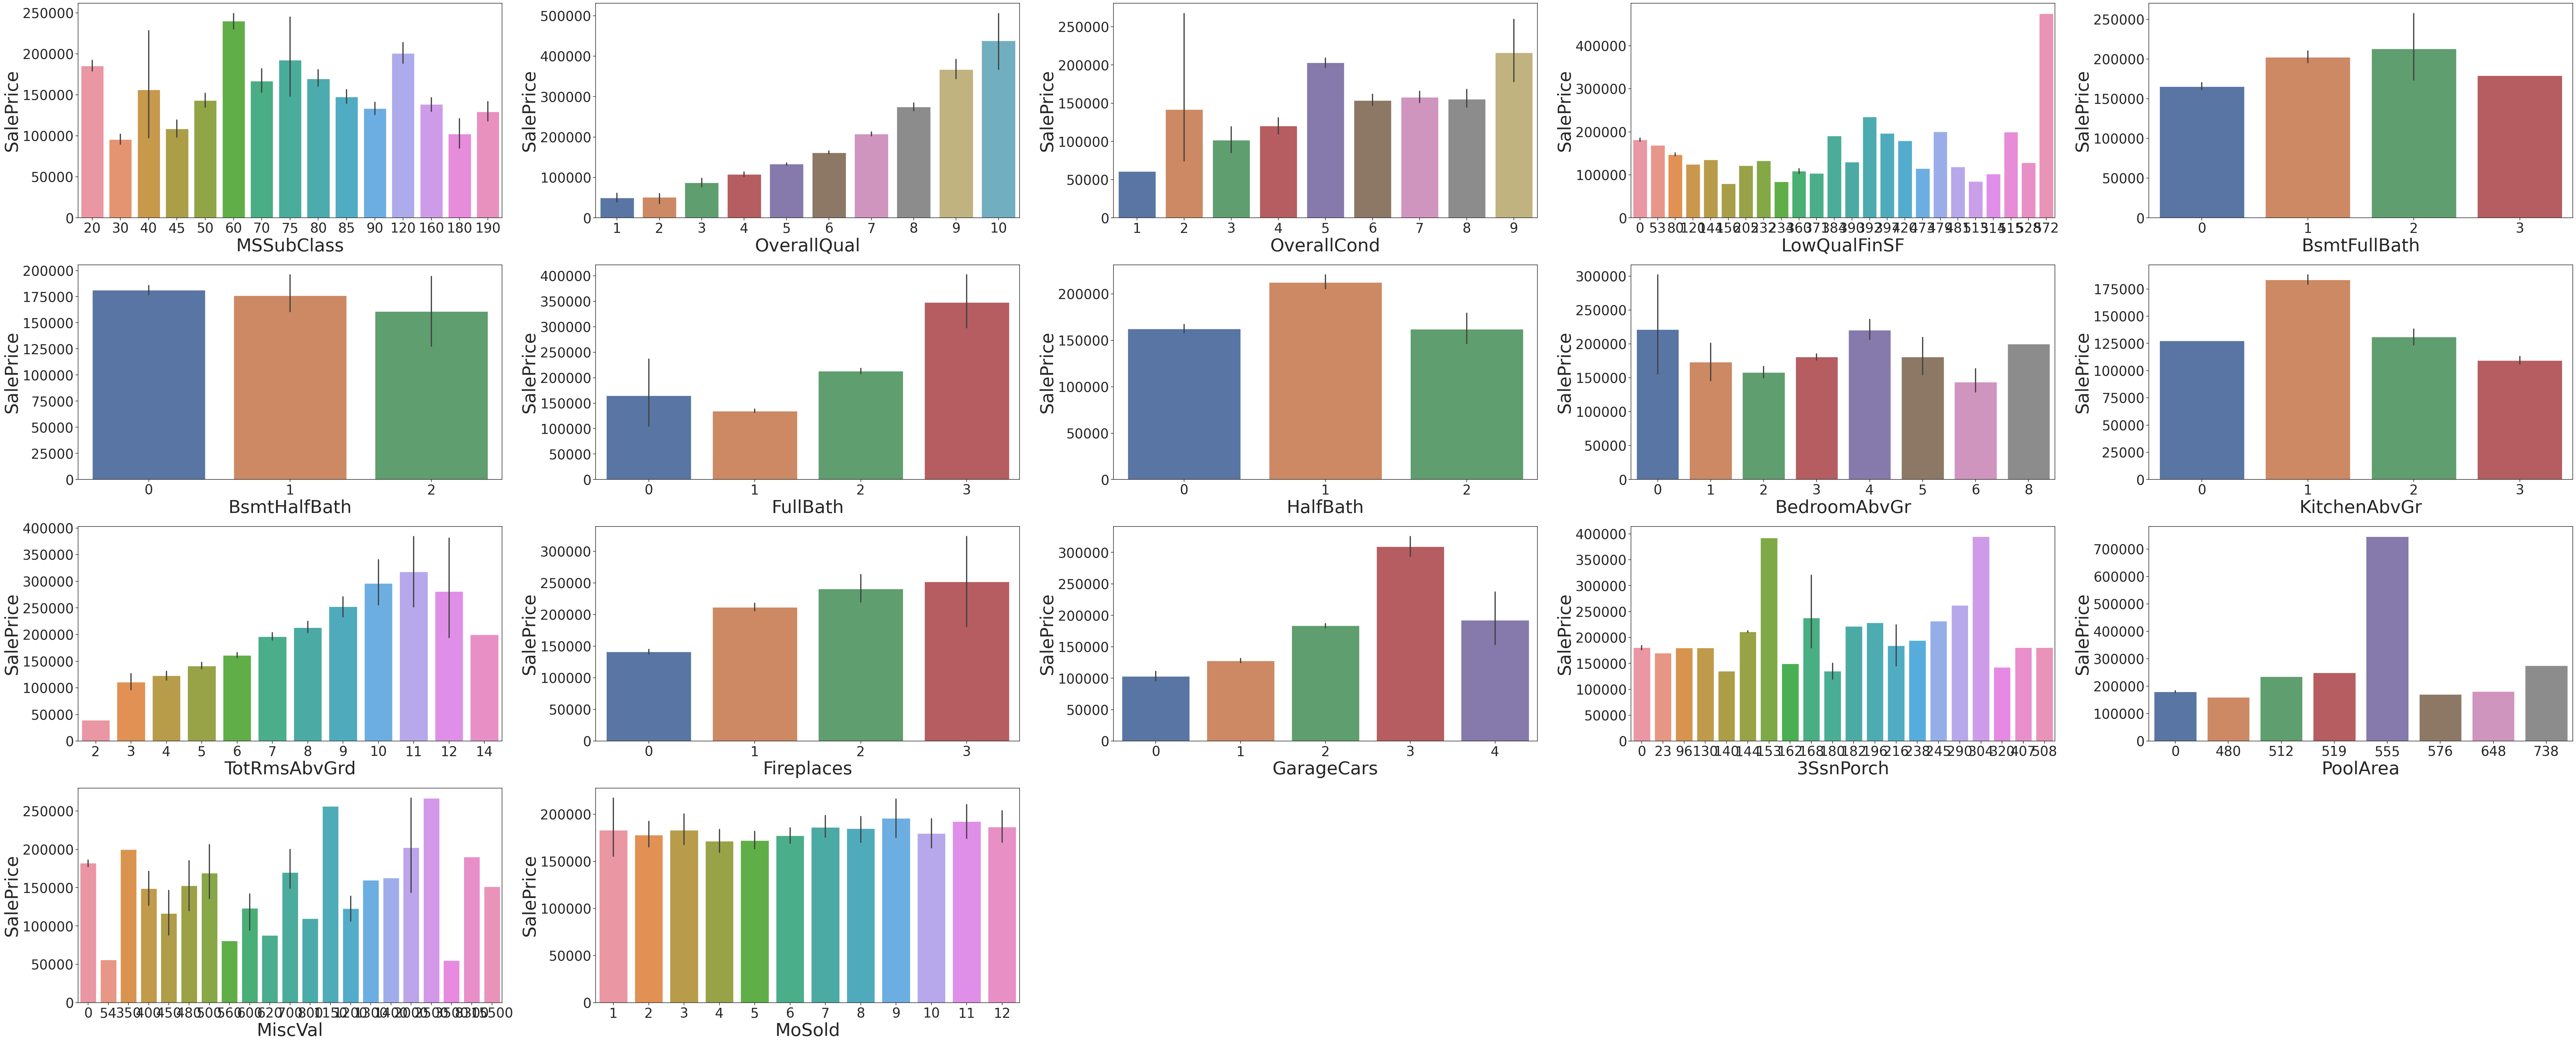

In [ ]:
# Plotting how every  discrete feature correlate with the "target"

plt.figure(figsize=(80, 80), facecolor='white')  # Canvas size
plotnumber = 1  # Count variable

for cols in data_discrete.columns:
    if cols != 'SalePrice':
        if plotnumber <= 50:
            ax = plt.subplot(10, 5, plotnumber)
            sns.barplot(x=data_discrete[cols], y=data_discrete['SalePrice'])
            plt.xlabel(cols, fontsize=40)
            plt.ylabel('SalePrice', fontsize=40)
            plt.xticks(fontsize=30)  # Increase x-axis tick font size
            plt.yticks(fontsize=30)  # Increase y-axis tick font size
            plotnumber += 1

plt.tight_layout()
plt.show()

### Missing values handling



In [ ]:
# Replace missing values with the median

data_numerical.loc[data_numerical['LotFrontage'].isnull()==True,'LotFrontage']=np.median(data_numerical.LotFrontage.dropna(axis=0))

# Replace missing values with 0
data_numerical["MasVnrArea"].fillna(0, inplace=True)

# Replace missing values with 0
data_numerical["GarageYrBlt"].fillna(0, inplace=True)

In [ ]:
data_numerical['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
print(data_numerical['LotFrontage'].median())

69.0


In [ ]:
data_numerical['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [ ]:
data_numerical.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
# Missing values categorial

for col in ('Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu'): # Cannot replace with mode. NA implies data not applicable for that variable
  data_categorical[col] = data_categorical[col].fillna('Missing')

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'): # Cannot replace with mode. NA implies data not applicable for that variable
    data_categorical[col] = data_categorical[col].fillna('Missing')

#Electrical
data_categorical['Electrical'] = data_categorical['Electrical'].fillna(data_categorical['Electrical'].mode()[0]) # Replaace with mode

#MasVnrType
data_categorical['MasVnrType'] = data_categorical['MasVnrType'].fillna('None') # None corresponds to house without a Mansonry

In [ ]:
data_categorical.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

## Encoding categorical columns

In [ ]:
data_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [ ]:
categorical_col = []  # list

for column in data.columns:  # for loop to access columns from the dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:  # checking datatype whether datatype is object/string and number of unique labels in the columns less than 50
        categorical_col.append(column)  # appending those columns in the list who satisfy the condition

        unique_values = data[column].unique()  # get unique values
        distribution = data[column].value_counts(normalize=True) * 100  # calculate distribution

        print(f"{column} : {unique_values}")
        print(f"Distribution:")
        print(distribution)
        print("====================================")

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Distribution:
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street : ['Pave' 'Grvl']
Distribution:
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Alley : [nan 'Grvl' 'Pave']
Distribution:
Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
Distribution:
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Distribution:
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities : ['AllPub' 'NoSeWa']
Distribution:
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Distribution:
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973


In [ ]:
processed_data_categorical = data_categorical.drop(columns=['Utilities', 'Street','SalePrice'], axis=1) # contain mostly single variable, without variations

In [ ]:
categorical_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
# using labelEncoder to convert objects
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Loop through categorical columns
for cols in processed_data_categorical.columns.values.flatten():
    # Apply label encoding to the column
    processed_data_categorical[cols] = encoder.fit_transform(processed_data_categorical[cols])

In [ ]:
processed_data_categorical

MSZoning  Alley  LotShape  LandContour  LotConfig  LandSlope  \
0            3      1         3            3          4          0   
1            3      1         3            3          2          0   
2            3      1         0            3          4          0   
3            3      1         0            3          0          0   
4            3      1         0            3          2          0   
...        ...    ...       ...          ...        ...        ...   
1455         3      1         3            3          4          0   
1456         3      1         3            3          4          0   
1457         3      1         3            3          4          0   
1458         3      1         3            3          4          0   
1459         3      1         3            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0                5           2           2         0           5          1   
1               24           1           2         0           2          1   
2                5           2           2         0           5          1   
3                6           2           2         0           5          1   
4               15           2           2         0           5          1   
...            ...         ...         ...       ...         ...        ...   
1455             8           2           2         0           5          1   
1456            14           2           2         0           2          1   
1457             6           2           2         0           5          1   
1458            12           2           2         0           2          3   
1459             7           2           2         0           2          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0            1           12           13           1          2          4   
1            1            8            8           2          3          4   
2            1           12           13           1          2          4   
3            1           13           15           2          3          4   
4            1           12           13           1          2          4   
...        ...          ...          ...         ...        ...        ...   
1455         1           12           13           2          3          4   
1456         1            9           10           3          3          4   
1457         1            5            5           2          0          2   
1458         1            8            8           2          3          4   
1459         1            6            6           2          2          4   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0              2         2         4             4             2   
1              1         2         4             1             0   
2              2         2         4             3             2   
3              0         4         1             4             0   
4              2         2         4             0             2   
...          ...       ...       ...           ...           ...   
1455           2         2         4             4             6   
1456           1         2         4             4             0   
1457           4         4         1             4             2   
1458           1         4         4             3             2   
1459           1         4         4             4             1   

      BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0                6        1          0           1           4            2   
1                6        1          0           1           4            3   
2                6        1          0           1           4            2   
3                6        1          2           1           4            2   
4                6        1          0           1           4     

## Feature selection

<Axes: >

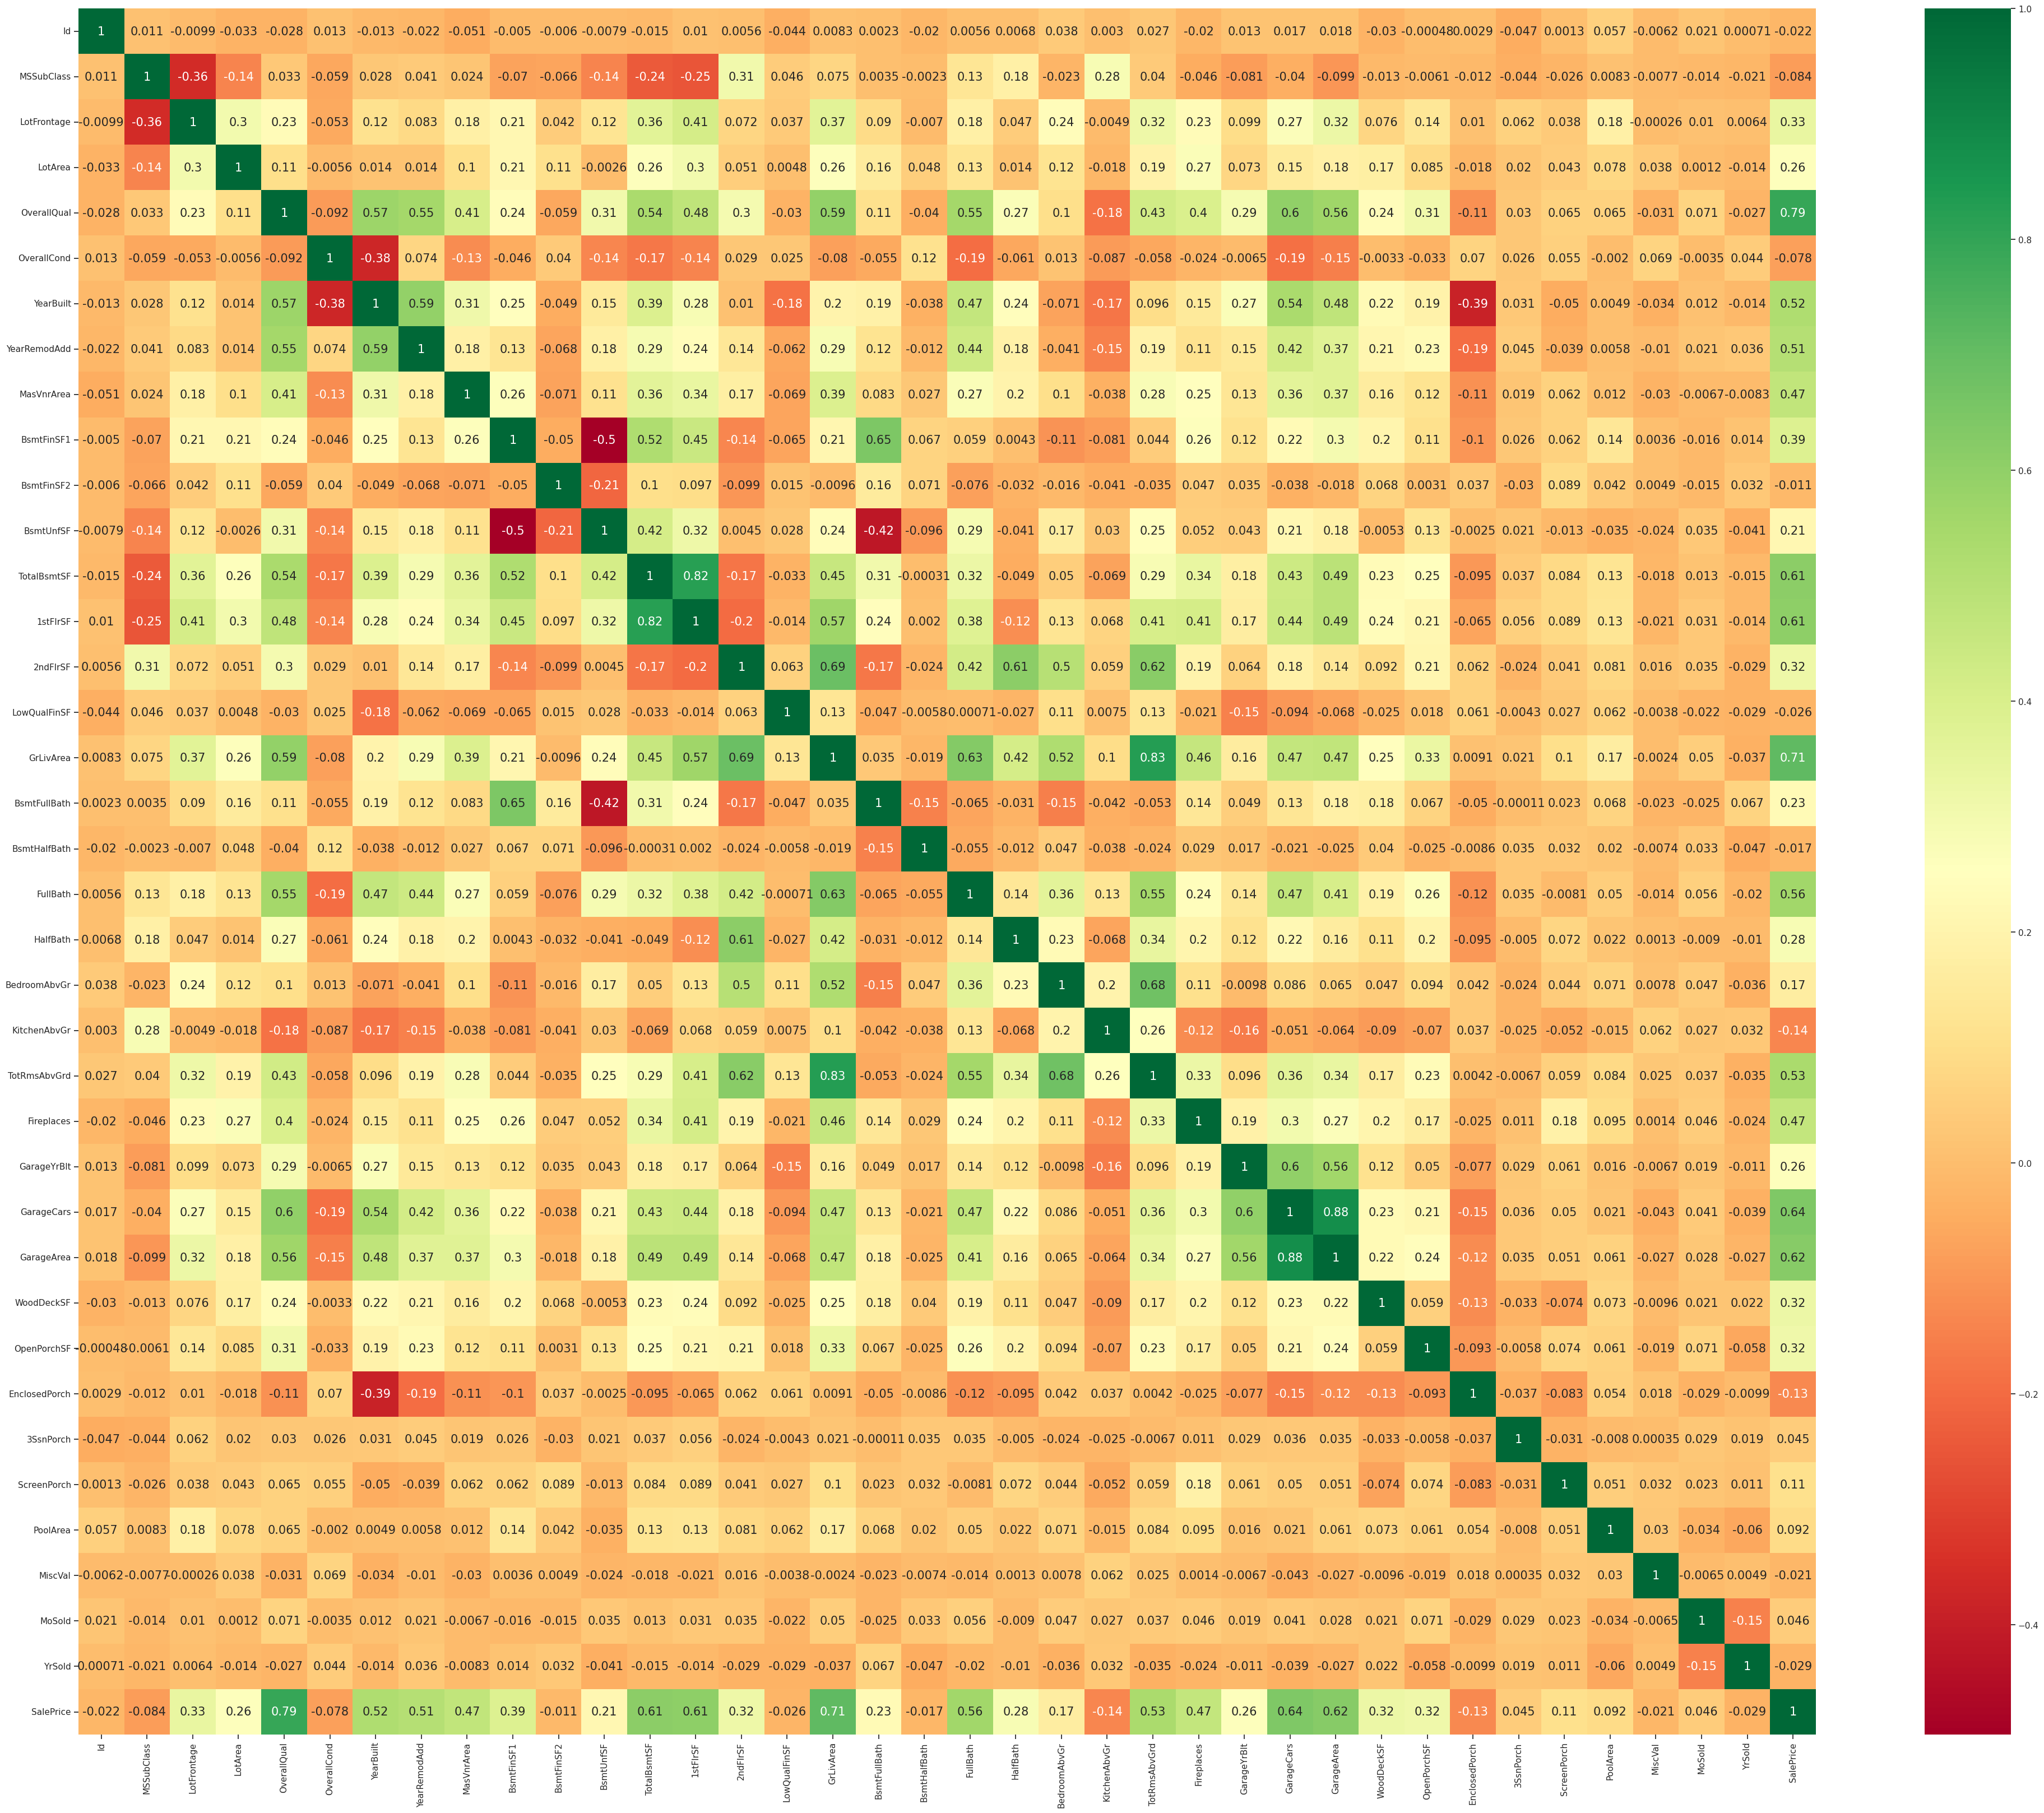

In [ ]:
## Checking correlation

plt.figure(figsize=(50, 40))#canvas size
sns.heatmap(data_numerical.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

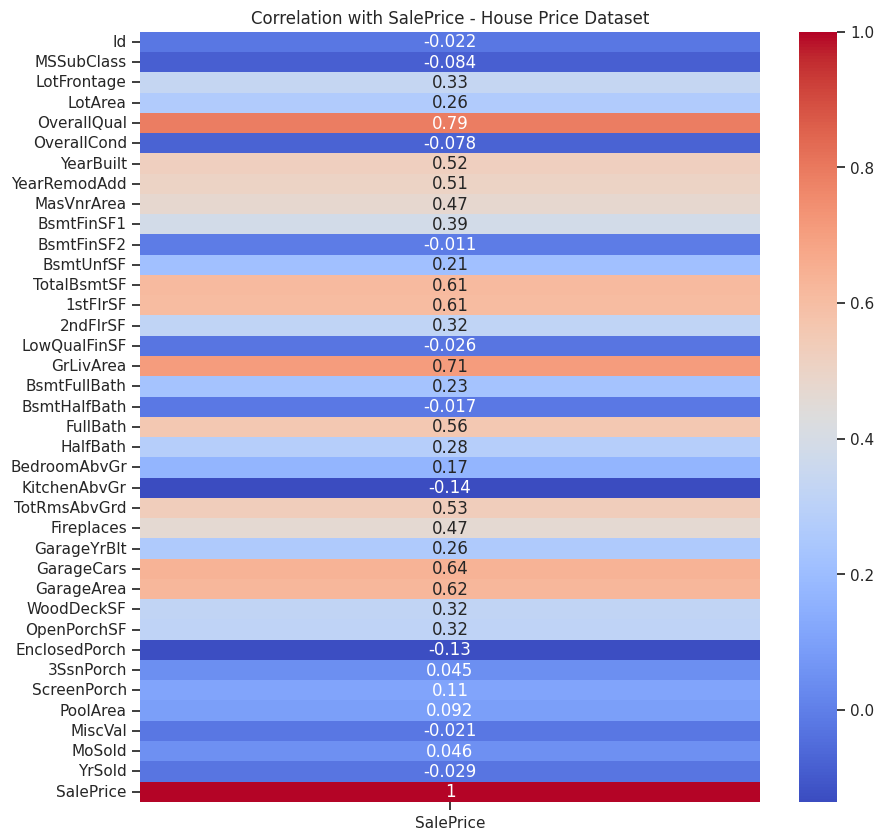

In [ ]:
correlation = data_numerical.corr()[['SalePrice']]
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation with SalePrice - House Price Dataset")
plt.show()

In [ ]:
data_numerical.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009921 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.356718 -0.139781     0.032628   
LotFrontage   -0.009921   -0.356718     1.000000  0.304522     0.234812   
LotArea       -0.033226   -0.139781     0.304522  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.042463  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.037469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006979  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.004905 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.233221  0.271364     0.396765   
GarageYrBlt    0.013491   -0.080997     0.099196  0.072599     0.288998   
GarageCars     0.016570   -0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323511  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.075542  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010287 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal       -0.006242   -0.007683    -0.000255  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006380 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334771  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

In [ ]:
processed_data_numerical = data_numerical.drop(columns=['Id'])

In [ ]:
processed_data_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Scaling

In [ ]:
feature_engineered_vars = pd.concat([data_continuous[['TotalSqrFt', 'TotalPorchArea']],
                                        data_datetime[['NumYearsbfSold', 'TimesinceRemod']]], axis=1)

feature_engineered_vars

TotalSqrFt  TotalPorchArea  NumYearsbfSold  TimesinceRemod
0         3420.0            61.0               5               0
1         2822.0             0.0              31               0
2         3572.0            42.0               7               1
3         3434.0            35.0              91              55
4         4588.0            84.0               8               0
...          ...             ...             ...             ...
1455      3294.0            40.0               8               1
1456      4495.0             0.0              32              10
1457      4680.0            60.0              69              65
1458      2522.0             0.0              60              46
1459      2512.0            68.0              43               0

[1460 rows x 4 columns]

In [ ]:
feature_engineered_vars.isnull().sum()

TotalSqrFt        0
TotalPorchArea    0
NumYearsbfSold    0
TimesinceRemod    0
dtype: int64

## Model Creation

In [ ]:
combined_processed_data1 = pd.concat([processed_data_categorical, processed_data_numerical],axis=1)

combined_processed_data2 = pd.concat([combined_processed_data1, feature_engineered_vars],axis=1)

In [ ]:
combined_processed_data2.shape

(1460, 82)

In [ ]:
# seperating targets and predictors
X=combined_processed_data1.iloc[:,:-1]
X

MSZoning  Alley  LotShape  LandContour  LotConfig  LandSlope  \
0            3      1         3            3          4          0   
1            3      1         3            3          2          0   
2            3      1         0            3          4          0   
3            3      1         0            3          0          0   
4            3      1         0            3          2          0   
...        ...    ...       ...          ...        ...        ...   
1455         3      1         3            3          4          0   
1456         3      1         3            3          4          0   
1457         3      1         3            3          4          0   
1458         3      1         3            3          4          0   
1459         3      1         3            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0                5           2           2         0           5          1   
1               24           1           2         0           2          1   
2                5           2           2         0           5          1   
3                6           2           2         0           5          1   
4               15           2           2         0           5          1   
...            ...         ...         ...       ...         ...        ...   
1455             8           2           2         0           5          1   
1456            14           2           2         0           2          1   
1457             6           2           2         0           5          1   
1458            12           2           2         0           2          3   
1459             7           2           2         0           2          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0            1           12           13           1          2          4   
1            1            8            8           2          3          4   
2            1           12           13           1          2          4   
3            1           13           15           2          3          4   
4            1           12           13           1          2          4   
...        ...          ...          ...         ...        ...        ...   
1455         1           12           13           2          3          4   
1456         1            9           10           3          3          4   
1457         1            5            5           2          0          2   
1458         1            8            8           2          3          4   
1459         1            6            6           2          2          4   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0              2         2         4             4             2   
1              1         2         4             1             0   
2              2         2         4             3             2   
3              0         4         1             4             0   
4              2         2         4             0             2   
...          ...       ...       ...           ...           ...   
1455           2         2         4             4             6   
1456           1         2         4             4             0   
1457           4         4         1             4             2   
1458           1         4         4             3             2   
1459           1         4         4             4             1   

      BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0                6        1          0           1           4            2   
1                6        1          0           1           4            3   
2                6        1          0           1           4            2   
3                6        1          2           1           4            2   
4                6        1          0           1           4     

In [ ]:
X2=combined_processed_data2.iloc[:,:-1] # Splitting of data with engineered features
X2.shape

(1460, 81)

In [ ]:
# Independent and dependent variable creation
y=combined_processed_data1.SalePrice ## y is output
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Split features

In [ ]:
# Step 1 Traning and testing data creation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
X_train.shape

(1168, 77)

In [ ]:
y_test.shape

(292,)

# Model Building

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=14)

In [ ]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

dt=DecisionTreeRegressor() # object creation for decision tree

dt.fit(X_train,y_train) # training the model

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(X_test) # prediction

In [ ]:
# Checking Accuracy score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_dt):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_dt):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt):.5f}')

Test Mean Squared Error: 1462125170.50137
Test Mean Absolute Error: 27332.61096
Test Mean Absolute Percentage Error: 0.15499
R2 Score: 0.76507


In [ ]:
y_train_predict = dt.predict(X_train)
print(f'R2 Score: {r2_score(y_train, y_train_predict):.2f}')

R2 Score: 1.00


### Hyper paramter tuning for Decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":('friedman_mse', 'poisson', 'squared_error', 'absolute_error'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2,20],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods

tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits
Best paramters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'splitter': 'random'})


In [ ]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'splitter': 'random'}

In [ ]:
tree_cv.best_score_#getting best score form cv

-1464550406.0414631

In [ ]:
dt_h=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,min_samples_leaf= 4,min_samples_split=20,splitter='random')#passing best parameter to decision tree

In [ ]:
dt_h.fit(X_train,y_train)#traing model with best parameter

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=4, min_samples_split=20,
                      splitter='random')

In [ ]:
y_pred_dth=dt_h.predict(X_test)#predicting
y_pred_dth

array([210100.14285714, 204314.79310345, 286134.18181818, 172004.72222222,
       116514.94736842,  93028.57142857, 157180.55555556, 226900.        ,
       144235.38888889, 175470.36363636, 118906.52173913, 157180.55555556,
       138243.42105263, 259840.52941176, 157180.55555556, 225269.11111111,
       157180.55555556, 144235.38888889, 116514.94736842, 193883.26086957,
       349162.55555556, 218336.94117647, 226336.84210526, 225269.11111111,
       112831.57894737, 226336.84210526, 112831.57894737,  94183.33333333,
       112831.57894737, 106191.72727273, 138243.42105263, 173937.5       ,
       286134.18181818, 259289.        , 212432.51851852, 307760.        ,
       129707.8125    , 123980.1875    , 134612.5       , 175470.36363636,
       134612.5       , 144048.93333333, 157180.55555556, 188727.77777778,
       198275.90909091, 118906.52173913, 144048.93333333, 226336.84210526,
       226336.84210526, 175112.5       , 225269.11111111, 193883.26086957,
       144048.93333333, 2

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_dth):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dth):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_dth):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_dth):.5f}')

Test Mean Squared Error: 1241290697.19427
Test Mean Absolute Error: 23626.70778
Test Mean Absolute Percentage Error: 0.13343
R2 Score: 0.80055


In [ ]:
y_train_predict = dt_h.predict(X_train)
print(f'R2 Score: {r2_score(y_train, y_train_predict):.2f}')

R2 Score: 0.88


## Random Forest- Ensemble Technique

In [ ]:
#model creation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([158828.95, 193787.17, 303138.06, 157355.5 , 161647.93, 107112.02,
       151595.1 , 192144.3 , 134440.58, 183474.85, 124527.33, 136762.25,
       133058.17, 252624.53, 182288.  , 212782.61, 180085.64, 126386.94,
       116980.76, 224284.08, 428917.34, 229706.96, 200213.6 , 209951.53,
       134806.5 , 242579.46, 134506.84, 108444.02, 111955.  , 105940.76,
       115666.7 , 158705.5 , 305627.  , 289206.16, 205393.35, 300186.87,
       127603.84, 119942.5 , 133748.  , 182908.77, 126093.18, 168642.  ,
       155183.5 , 176941.22, 287323.5 , 109898.49, 153634.8 , 257450.87,
       245277.63, 164306.18, 166336.13, 196821.24, 147535.74, 268311.58,
       130088.5 , 293838.05, 347514.56,  98915.82, 144130.39, 230429.2 ,
       199012.  , 170971.58, 179097.98, 225886.83, 174118.5 , 257308.97,
       167143.58, 133140.6 , 160030.  , 230509.87, 197588.5 , 224939.71,
       156065.35, 164841.55, 310906.89, 257866.38, 140834.49, 169258.45,
       191947.82, 177538.75, 428386.2 , 149904.18, 

In [ ]:
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_rf):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_rf):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_rf):.5f}')

Test Mean Squared Error: 711713447.66490
Test Mean Absolute Error: 16770.99403
Test Mean Absolute Percentage Error: 0.09380
R2 Score: 0.88564


In [ ]:
#checking cross validation score
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
print(r2_scores)
# Print mean and standard deviation of R-squared scores
print("Random Forest Regressor Cross-Validation R-squared Scores:")
print("Mean R-squared:", np.mean(r2_scores))
print("Standard Deviation of R-squared:", np.std(r2_scores))

[0.88927785 0.75524177 0.86618645]
Random Forest Regressor Cross-Validation R-squared Scores:
Mean R-squared: 0.836902022551561
Standard Deviation of R-squared: 0.05850698484623401


### Hyper parameter tuning for Randomforest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
rf_reg = RandomForestRegressor(n_estimators= 66, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)#passing best parameter to randomforest

rf_reg.fit(X_train,y_train)#training

y_rf_reg=rf_reg.predict(X_test)#testing

In [ ]:
# Checking Accuracy score
import math

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_rf_reg):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_rf_reg):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_rf_reg):.5f}')
print(f'R2 Score: {r2_score(y_test, y_rf_reg):.5f}')

Test Mean Squared Error: 812343988.91800
Test Mean Absolute Error: 17099.83893
Test Mean Absolute Percentage Error: 0.09626
R2 Score: 0.86947


# XGB Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test) ## predicting the price

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_gbm):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_gbm):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_gbm):.5f}')
print(f'R2 Score: {r2_score(y_test, y_gbm):.5f}')

Test Mean Squared Error: 663367315.81614
Test Mean Absolute Error: 15492.96520
Test Mean Absolute Percentage Error: 0.08520
R2 Score: 0.89341


In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBRegressor#importing the model library

In [ ]:
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb=xgb_r.predict(X_test) # predicting the strength of concrete

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_xgb):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_xgb):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_xgb):.5f}')

Test Mean Squared Error: 781652563.58000
Test Mean Absolute Error: 16740.22297
Test Mean Absolute Percentage Error: 0.09096
R2 Score: 0.87441


## Hyper parameter tuning for XGBoost


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='neg_mean_absolute_error',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameter

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 12.8, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.8})


In [ ]:
XGB2=XGBRegressor(reg_lambda= 12.8, reg_alpha= 0.1, n_estimators=150, max_depth=5, learning_rate=0.1, gamma=0.8)
XGB2.fit(X_train, y_train)#training
y_predict_xgb2=XGB2.predict(X_test) # testing

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_predict_xgb2):.5f}')
print(f'R2 Score: {r2_score(y_test, y_predict_xgb2):.5f}')

Test Mean Squared Error: 733883964.32830
Test Mean Absolute Error: 16156.59127
Test Mean Absolute Percentage Error: 0.08654
R2 Score: 0.88208


# Model Performance Summary


In [ ]:
# Assuming compiled_results is your DataFrame
data = {
    'Model': ['DT', 'DT_H','RF','RF_H','XGB', 'XGBoost','XGBOOST_H'],
    'MAPE': [0.151, 0.139, 0.095, 0.092, 0.085, 0.091,0.087],
    'R-squared': [0.781, 0.749, 0.883, 0.878, 0.889, 0.874, 0.882]
}

compiled_results = pd.DataFrame(data)
compiled_results.set_index('Model', inplace=True)
print(compiled_results)

            MAPE  R-squared
Model                      
DT         0.151      0.781
DT_H       0.139      0.749
RF         0.095      0.883
RF_H       0.092      0.878
XGB        0.085      0.889
XGBoost    0.091      0.874
XGBOOST_H  0.087      0.882


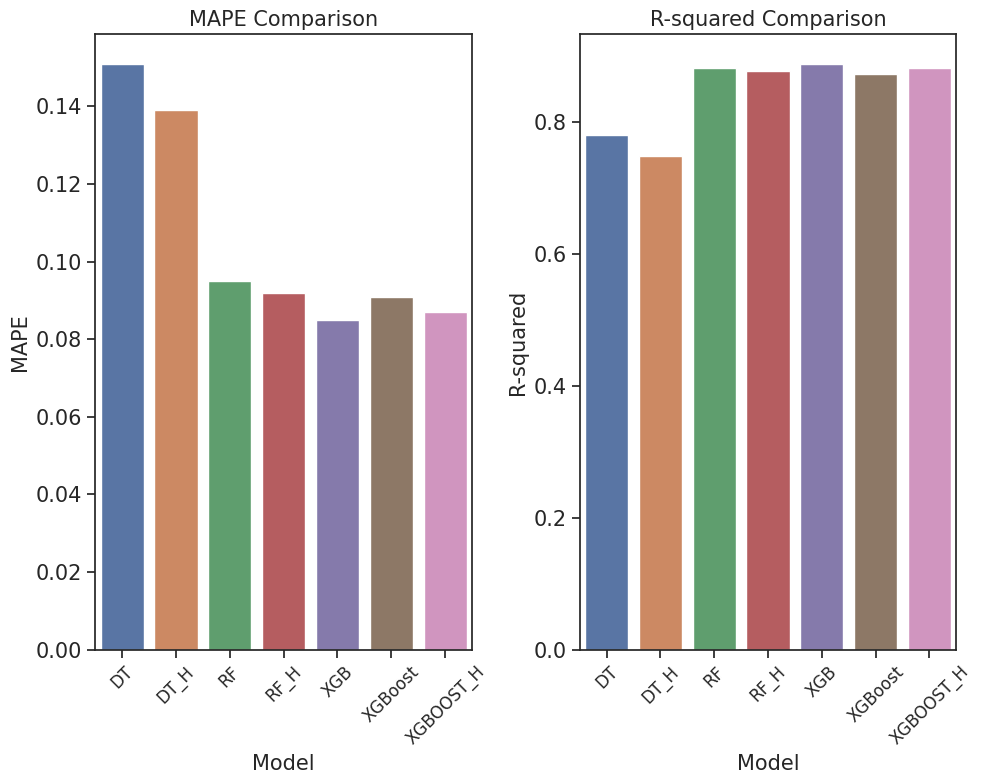

In [ ]:
# Extracting metric columns
metrics = compiled_results.columns  # Exclude 'Model'

# Number of subplots
num_plots = len(metrics)

# Create a subplot with a 2x2 grid
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Flatten the 2x2 subplot grid for iteration
axes = axes.flatten()

# Loop through each metric and create a bar plot on each axis
for i, metric in enumerate(metrics):
    sns.barplot(x=compiled_results.index, y=compiled_results[metric], ax=axes[i])
    axes[i].set_title(f'{metric} Comparison',fontsize=15)
    axes[i].set_ylabel(metric,fontsize=15)
    axes[i].set_xlabel('Model',fontsize=15)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y',labelsize=15)

# Adjust layout
plt.tight_layout()
plt.show()

## Model Creation with Engineered Features

### Decision Tree2

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X2,y,random_state=14)

In [ ]:
from sklearn.tree import DecisionTreeRegressor #importing decision tree from sklearn.tree

dt=DecisionTreeRegressor() # object creation for decision tree

dt.fit(X_train,y_train) # training the model

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(X_test) # prediction

In [ ]:
# Checking Accuracy score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_dt):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_dt):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt):.5f}')

Test Mean Squared Error: 25406507.52603
Test Mean Absolute Error: 1031.08219
Test Mean Absolute Percentage Error: 0.00384
R2 Score: 0.99592


In [ ]:
y_train_predict = dt.predict(X_train)
print(f'R2 Score: {r2_score(y_train, y_train_predict):.2f}')

R2 Score: 1.00


### Hyper paramter tuning for Decision tree2


In [ ]:
params = {
    "criterion":('friedman_mse', 'poisson', 'squared_error', 'absolute_error'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2,20],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

tree_reg = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods

tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits
Best paramters: {'criterion': 'poisson', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [ ]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'poisson',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
tree_cv.best_score_#getting best score form cv

-10130130.171689497

In [ ]:
dt_h=DecisionTreeRegressor(criterion='poisson',max_depth=12,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [ ]:
dt_h.fit(X_train,y_train)#traing model with best parameter

DecisionTreeRegressor(criterion='poisson', max_depth=12)

In [ ]:
y_pred_dth=dt_h.predict(X_test)#predicting
y_pred_dth

array([127500., 191000., 295493., 148500., 134800., 109500., 147000.,
       207500., 126000., 173000., 131000., 160000., 132000., 241000.,
       183900., 240000., 140000., 107000.,  90000., 206000., 378500.,
       240000., 191000., 191000., 100000., 266000., 128500., 108500.,
       114504.,  98000., 130250., 157000., 275000., 274000., 219500.,
       253000., 118500., 117000., 118500., 199900., 131500., 170000.,
       149900., 175000., 361919., 109900., 117000., 236500., 233170.,
       165000., 145000., 194201., 139950., 253293., 133900., 342643.,
       315000.,  97500., 149900., 230000., 192000., 167240., 194000.,
       211000., 178000., 234000., 169500., 142125., 176000., 226000.,
       201000., 262000., 146500., 155000., 326000., 239000., 148000.,
       176000., 184100., 163900., 378500., 140000.,  81000., 248000.,
       110000., 134500., 137500., 213000., 197000., 108959., 228500.,
       110000., 209500., 119000., 263000., 197900., 131000., 163000.,
       185000., 1470

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_dth):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dth):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_dth):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_dth):.5f}')

Test Mean Squared Error: 48500145.44932
Test Mean Absolute Error: 1067.07671
Test Mean Absolute Percentage Error: 0.00362
R2 Score: 0.99221


In [ ]:
y_train_predict = dt_h.predict(X_train)
print(f'R2 Score: {r2_score(y_train, y_train_predict):.5f}')

R2 Score: 1.00000


## Random Forest- Ensemble Technique2

In [ ]:
#model creation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([127415.75, 190580.6 , 294674.52, 148499.  , 134947.  , 109507.36,
       147029.  , 207288.  , 125994.5 , 172908.18, 130378.5 , 159979.2 ,
       132069.5 , 241906.96, 183866.  , 239971.21, 140014.5 , 107473.77,
        89798.5 , 207254.5 , 388789.95, 239835.57, 192095.21, 190533.8 ,
       100024.52, 265813.47, 128461.  , 107927.01, 114928.34,  96818.  ,
       130056.  , 156634.16, 275054.4 , 274978.63, 219724.41, 254722.5 ,
       118480.58, 116618.  , 118069.58, 200061.89, 131402.5 , 169943.4 ,
       149852.5 , 175055.  , 360807.8 , 109962.  , 116941.  , 236184.4 ,
       233020.3 , 164904.8 , 145007.  , 194837.04, 139972.  , 254598.64,
       133837.  , 340763.76, 315374.5 ,  96784.  , 149878.  , 230159.6 ,
       190528.4 , 167138.9 , 194533.09, 211946.  , 177986.  , 234675.7 ,
       168915.9 , 142070.78, 175955.4 , 225830.  , 200336.88, 261863.42,
       145866.  , 155122.  , 325244.  , 239205.68, 148065.  , 175930.  ,
       183936.  , 163985.8 , 373426.64, 139980.5 , 

In [ ]:
print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_rf):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_rf):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_rf):.5f}')

Test Mean Squared Error: 11615566.29946
Test Mean Absolute Error: 637.28482
Test Mean Absolute Percentage Error: 0.00249
R2 Score: 0.99813


In [ ]:
#checking cross validation score
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='r2')
print(r2_scores)
# Print mean and standard deviation of R-squared scores
print("Random Forest Regressor Cross-Validation R-squared Scores:")
print("Mean R-squared:", np.mean(r2_scores))
print("Standard Deviation of R-squared:", np.std(r2_scores))

[0.99956533 0.98560426 0.99212952]
Random Forest Regressor Cross-Validation R-squared Scores:
Mean R-squared: 0.9924330379325482
Standard Deviation of R-squared: 0.005703620540972055


### Hyper parameter tuning for Randomforest2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


In [ ]:
rf_reg = RandomForestRegressor(n_estimators= 50, min_samples_split= 10, min_samples_leaf= 2, max_features= 'auto', max_depth= 30, bootstrap= False)#passing best parameter to randomforest

rf_reg.fit(X_train,y_train)#training

y_rf_reg=rf_reg.predict(X_test)#testing

In [ ]:
# Checking Accuracy score
import math

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_rf_reg):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_rf_reg):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_rf_reg):.5f}')
print(f'R2 Score: {r2_score(y_test, y_rf_reg):.5f}')

Test Mean Squared Error: 32690175.61796
Test Mean Absolute Error: 1001.18340
Test Mean Absolute Percentage Error: 0.00358
R2 Score: 0.99475


# XGB Regressor

In [ ]:
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test) ## predicting the price

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_gbm):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_gbm):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_gbm):.5f}')
print(f'R2 Score: {r2_score(y_test, y_gbm):.5f}')

Test Mean Squared Error: 13638175.70710
Test Mean Absolute Error: 910.01075
Test Mean Absolute Percentage Error: 0.00418
R2 Score: 0.99781


In [ ]:
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb=xgb_r.predict(X_test) # predicting the strength of concrete

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_pred_xgb):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_xgb):.5f}')
print(f'R2 Score: {r2_score(y_test, y_pred_xgb):.5f}')

Test Mean Squared Error: 74000431.44610
Test Mean Absolute Error: 1598.27220
Test Mean Absolute Percentage Error: 0.00630
R2 Score: 0.98811


## Hyper parameter tuning for XGBoost2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='neg_mean_absolute_error',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameter

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0, 'reg_alpha': 200, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 3.2})


In [ ]:
XGB2=XGBRegressor(reg_lambda= 0, reg_alpha= 200, n_estimators=100, max_depth=6, learning_rate=0.2, gamma=3.2)
XGB2.fit(X_train, y_train)#training
y_predict_xgb2=XGB2.predict(X_test) # testing

In [ ]:
# Checking Accuracy score

print(f'Test Mean Squared Error: {mean_squared_error(y_test,y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Error: {mean_absolute_error(y_test, y_predict_xgb2):.5f}')
print(f'Test Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_predict_xgb2):.5f}')
print(f'R2 Score: {r2_score(y_test, y_predict_xgb2):.5f}')

Test Mean Squared Error: 52963079.06294
Test Mean Absolute Error: 1183.51718
Test Mean Absolute Percentage Error: 0.00414
R2 Score: 0.99149
